<a href="https://colab.research.google.com/github/IvanKatorgin/Diplom/blob/main/Data_scientist_%D0%B4%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_2_3_%D0%B3%D0%B8%D0%B1%D1%80%D0%B8%D0%B4%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дипломный проект обучения по профессии "Data scientist". Каторгин И.П. Группа dsu-prod-67

## Тема дипломной работы: "Определение пола, возраста и этноса человека по фотографии и генерация лиц по заданным атрибутам с применением нейронных сетей и методов компьютерного зрения"

Описание задачи:

1. Определение пола, возраста и этноса человека по фотографии
2. Генерация лиц по заданным атрибутам

## Задача 2. Генерация лиц по заданным атрибутам. Гибридная модель: условная Deep Convolutional GAN (cDCGAN) для генерации лиц по заданым атрибутам

# Загрузим необходимые библиотеки

In [ ]:
# загрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import time
import shutil
import pickle
from PIL import Image
import plotly.express as px
import seaborn as sns
import collections
from collections import Counter
import cv2
from skimage import measure
import random
import math
import json
import platform
from tqdm import tqdm
from glob import glob
from scipy import stats
from scipy.linalg import sqrtm
from datetime import datetime
from IPython.display import HTML, display, clear_output
from pathlib import Path
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import warnings  # Import 'warnings' module to manage warnings
warnings.filterwarnings("ignore", category=UserWarning, message="A NumPy version.*is required for this version of SciPy")
warnings.filterwarnings("ignore", category=UserWarning, message="unable to load libtensorflow_io_plugins.so")
warnings.filterwarnings("ignore", category=UserWarning, message="file system plugins are not loaded")

In [ ]:
# Для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, recall_score,
                              mean_absolute_error, mean_squared_error, precision_score, f1_score, r2_score)
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from typing import Optional, Tuple

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras import backend as K
from tensorflow.keras.layers import (Dense, Activation, Input, Conv2D, MaxPooling2D, Add,
                                    BatchNormalization, Dropout, Flatten, GlobalAveragePooling2D,
                                    Multiply, Permute, Lambda, Softmax, Reshape, SpectralNormalization)
from tensorflow.keras.models import Model, Sequential, save_model, load_model, model_from_json
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import History
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, Accuracy

# Загрузим датасет

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ivankatorgin","key":"05d45a90c7adff24b166d06966bd8d07"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rohitgrewal/airlines-flights-data                               Airlines Flights Data                                  2440299  2025-07-29 09:16:00.463000          13758        273  1.0              
wasiqaliyasir/breast-cancer-dataset                             Breast cancer dataset                                    49830  2025-07-30 12:52:44.057000           8181        279  1.0              
kunshbhatia/delhi-air-quality-dataset                           Delhi Air Quality Dataset                                30430  2025-07-28 14:00:14.247000           5630        113  1.0              


In [ ]:
!kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

Dataset URL: https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv
License(s): copyright-authors
  0% 0.00/63.2M [00:00<?, ?B/s]
100% 63.2M/63.2M [00:00<00:00, 1.02GB/s]


In [ ]:
!unzip /content/age-gender-and-ethnicity-face-data-csv.zip

Archive:  /content/age-gender-and-ethnicity-face-data-csv.zip
  inflating: age_gender.csv          


In [ ]:
# загрузим файл
df = pd.read_csv('/content/age_gender.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


## Аугментация, балансировка датасета, нормализация данных

Выполним аугментацию, чтобы распределение по возрастам и этносам было сбалансировано

In [ ]:
# максимальный возраст
df['age'].max()

116

In [ ]:
# Загрузка и подготовка данных
def prepare_data(df):
    # Преобразование пикселей
    df['pixels_array'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype='uint8').reshape(48, 48))

    # Оптимальные возрастные группы
    age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115]
    df['age_group'] = pd.cut(df['age'], bins=age_bins)

    # Удаление только явных пропусков
    df = df.dropna(subset=['ethnicity', 'age_group'])
    return df

In [ ]:
df = prepare_data(df.copy())

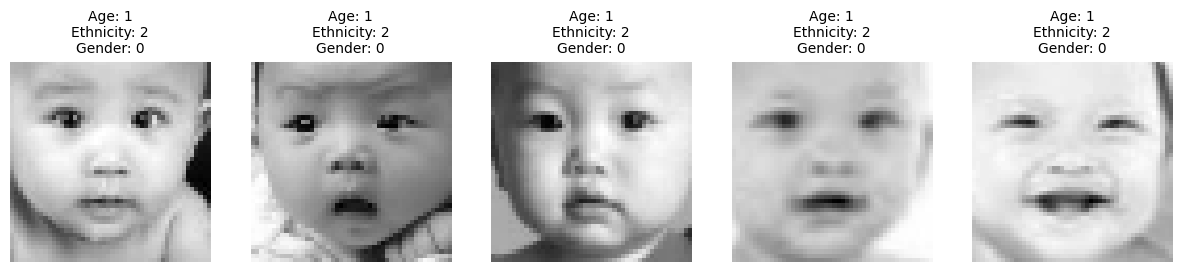

In [ ]:
# визуализируем часть изображений
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    # Reshape пикселей до 48x48
    img = df['pixels_array'].iloc[i].reshape(48, 48)
    ax.imshow(img, cmap='gray')
    ax.axis("off")
    ax.set_title(
        f"Age: {df['age'].iloc[i]}\nEthnicity: {df['ethnicity'].iloc[i]}\nGender: {df['gender'].iloc[i]}",
        fontsize=10
    )

plt.show()

In [ ]:
# Инициализация ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,      # случайный поворот на ±15 градусов
    width_shift_range=0.1, # случайный сдвиг по ширине на ±10%
    height_shift_range=0.1, # случайный сдвиг по высоте на ±10%
    shear_range=0.1,       # случайный сдвиг
    zoom_range=0.1,        # случайное увеличение/уменьшение
    horizontal_flip=True,  # случайное отражение по горизонтали
    fill_mode='nearest'    # заполнение пикселей при трансформациях
)

In [ ]:
# Функция для аугментации с полной балансировкой
def optimal_balance(df, target_column, target_count=None, balance_factor=0.7):
    """
    Улучшенная функция балансировки

    Параметры:
    - target_count: явно заданное целевое количество (приоритет)
    - balance_factor: используется если target_count=None
    """
    counts = df[target_column].value_counts()

    if target_count is None:
        target_count = int(counts.mean() * (1 - balance_factor) + counts.median() * balance_factor)
    else:
        # Округляем target_count до целого числа
        target_count = int(round(target_count))

    print(f"Балансировка {target_column} до {target_count} образцов на группу")

    balanced_dfs = []

    for group in df[target_column].unique():
        group_df = df[df[target_column] == group]
        current_count = len(group_df)

        if current_count < target_count:
            needed = target_count - current_count
            augmented = []

            for _ in tqdm(range(needed), desc=f"{target_column}: {group}"):
                sample = group_df.sample(1).iloc[0]
                img = sample['pixels_array']

                img_3d = np.expand_dims(img, axis=-1)
                img_3d = np.repeat(img_3d, 3, axis=-1)
                aug_img = datagen.random_transform(img_3d)[:, :, 0]

                new_row = sample.copy()
                new_row['pixels'] = ' '.join(aug_img.flatten().astype(str))
                augmented.append(new_row)

            group_df = pd.concat([group_df, pd.DataFrame(augmented)], ignore_index=True)
        elif current_count > target_count:
            group_df = group_df.sample(target_count, random_state=42)

        balanced_dfs.append(group_df)

    return pd.concat(balanced_dfs, ignore_index=True)

In [ ]:
# Балансируем по этносам (целевое количество - среднее в самой большой группе)
# Сначала балансируем по этносам
target_ethnicity = df['ethnicity'].value_counts().mean()
target_ethnicity = int(round(target_ethnicity))  # Округляем до целого
print(f"\nБалансируем этносы до {target_ethnicity} образцов каждый...")
df_balanced = optimal_balance(df, 'ethnicity', target_count=target_ethnicity)

# Затем балансируем по возрастным группам
target_age = df_balanced['age_group'].value_counts().mean()
target_age = int(round(target_age))  # Округляем до целого
print(f"\nБалансируем возрастные группы до {target_age} образцов каждая...")
df_balanced = optimal_balance(df_balanced, 'age_group', target_count=target_age)


Балансируем этносы до 4740 образцов каждый...
Балансировка ethnicity до 4740 образцов на группу


ethnicity: 1: 100%|██████████| 214/214 [00:00<00:00, 478.61it/s]



Балансируем возрастные группы до 1030 образцов каждая...
Балансировка age_group до 1030 образцов на группу


age_group: (110, 115]: 100%|██████████| 1028/1028 [00:02<00:00, 444.31it/s]


In [ ]:
# Удаляем временные столбцы
df_balanced.drop(['pixels_array', 'age_group'], axis=1, inplace=True)

In [ ]:
# Проверяем результаты
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115]

print("\nРезультаты балансировки:")
print("\nРаспределение по этносам:")
print(df_balanced['ethnicity'].value_counts())

print("\nРаспределение по возрастам:")
print(pd.cut(df_balanced['age'], bins=age_bins).value_counts().sort_index())


Результаты балансировки:

Распределение по этносам:
ethnicity
0    7609
2    5393
1    4426
3    3617
4    2645
Name: count, dtype: int64

Распределение по возрастам:
age
(0, 5]        1030
(5, 10]       1030
(10, 15]      1030
(15, 20]      1030
(20, 25]      1030
(25, 30]      1030
(30, 35]      1030
(35, 40]      1030
(40, 45]      1030
(45, 50]      1030
(50, 55]      1030
(55, 60]      1030
(60, 65]      1030
(65, 70]      1030
(70, 75]      1030
(75, 80]      1030
(80, 85]      1030
(85, 90]      1030
(90, 95]      1030
(95, 100]     1030
(100, 105]    1030
(105, 110]    1030
(110, 115]    1030
Name: count, dtype: int64


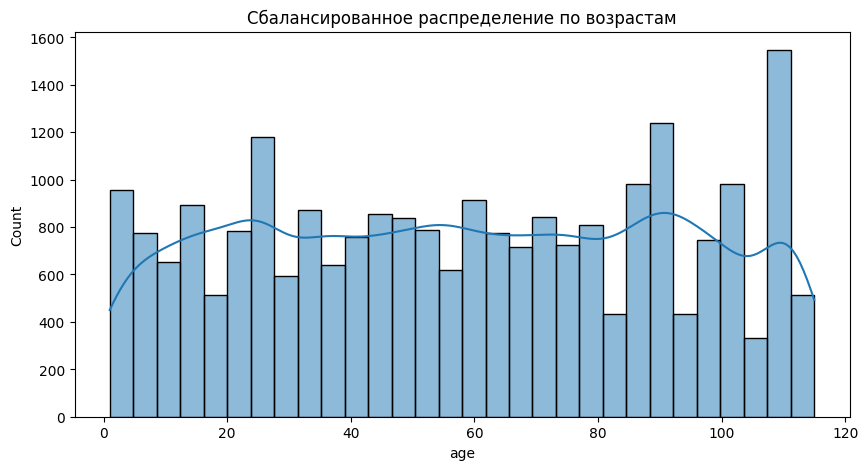

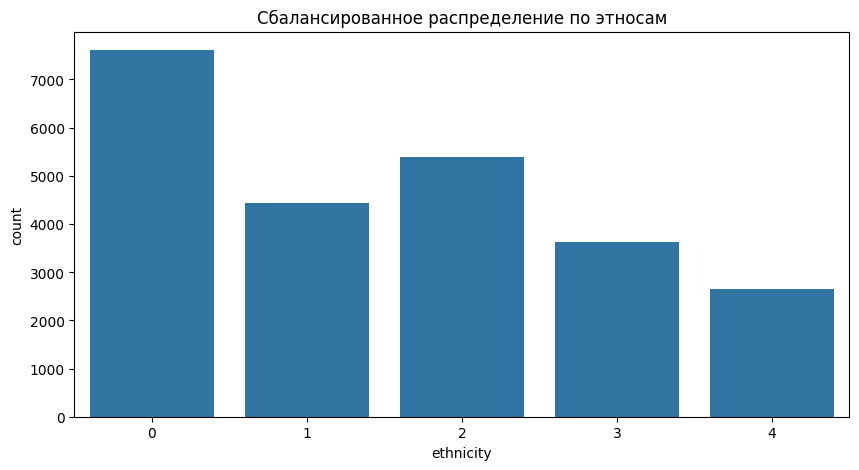

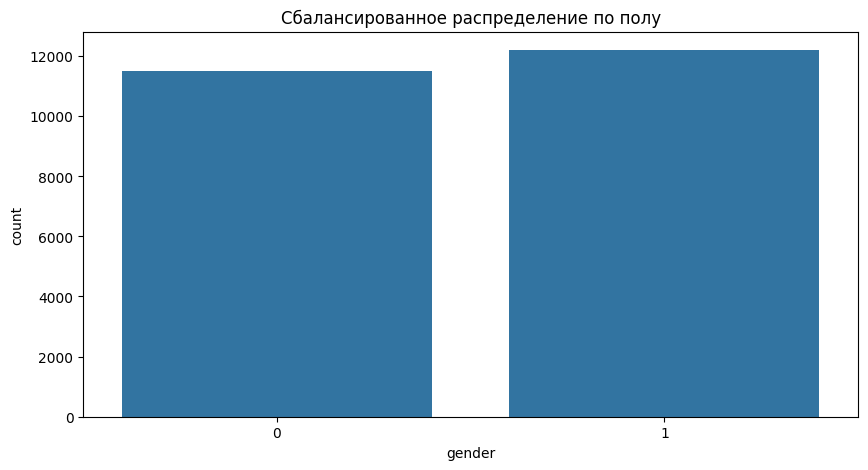

In [ ]:
# Визуализируем новые распределения
plt.figure(figsize=(10, 5))
sns.histplot(df_balanced['age'], bins=30, kde=True)
plt.title('Сбалансированное распределение по возрастам')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_balanced, x='ethnicity')
plt.title('Сбалансированное распределение по этносам')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_balanced, x='gender')
plt.title('Сбалансированное распределение по полу')
plt.show()

Теперь датасет сбалансирован, выбросов и аномалий нет. Пропуски отсутствуют. Можно приступать к решению основных задач

Выполним нормализацию

In [ ]:
# Преобразуем строки пикселей обратно в массивы перед нормализацией
X = np.array([np.fromstring(pixels,
                            dtype=np.uint8, sep=' ').reshape(48, 48) for pixels in df_balanced['pixels']]) / 255.0

# Разметка для пола (0: муж, 1: жен)
y_gender = df_balanced['gender'].values

# Разметка для этноса (0-4)
y_ethnicity = df_balanced['ethnicity'].values

# Разметка для возраста (регрессия)
y_age = df_balanced['age'].values

In [ ]:
# Убедимся, что X имеет правильную форму
print(f"Исходная форма X: {X.shape}")

Исходная форма X: (23690, 48, 48)


In [ ]:
# Добавим dimension для канала если нужно
if len(X.shape) == 3:
    X = np.expand_dims(X, axis=-1)
    print(f"Форма X после добавления канала: {X.shape}")

Форма X после добавления канала: (23690, 48, 48, 1)


In [ ]:
# Проверим диапазон значений
print(f"Диапазон значений X: [{X.min()}, {X.max()}]")

Диапазон значений X: [0.0, 1.0]


Создадим гибридную модель: условная Deep Convolutional GAN (cDCGAN) для генерации лиц по заданым атрибутам

## Гибридная модель: условная Deep Convolutional GAN (cDCGAN) для генерации лиц по заданым атрибутам

In [ ]:
# Параметры
IMG_SIZE = 48
CHANNELS = 1
LATENT_DIM = 256
BATCH_SIZE = 32
EPOCHS = 80

NUM_CLASSES = {
    'gender': 2,     # 0=мужчина, 1=женщина
    'ethnicity': 5,  # 0-4
    'age': 1         # регрессия (нормализованный возраст 0-1)
}

In [ ]:
# Настройки для воспроизводимости
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
# Создание tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices(
    (X, y_gender, y_ethnicity, y_age))
dataset = dataset.shuffle(1000).batch(BATCH_SIZE)

In [ ]:
# настройка весов
weight_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

In [ ]:
# Генератор
def build_generator(latent_dim=LATENT_DIM):
    # Входы
    noise_input = layers.Input(shape=(latent_dim,), name='noise_input')
    gender_input = layers.Input(shape=(1,), dtype='int32', name='gender_input')
    ethnicity_input = layers.Input(shape=(1,), dtype='int32', name='ethnicity_input')
    age_input = layers.Input(shape=(1,), name='age_input')

    # Embedding и обработка условий
    gender_embed = layers.Embedding(NUM_CLASSES['gender'], 12)(gender_input)
    ethnicity_embed = layers.Embedding(NUM_CLASSES['ethnicity'], 12)(ethnicity_input)

    gender_embed = layers.Flatten()(gender_embed)
    ethnicity_embed = layers.Flatten()(ethnicity_embed)
    age_flat = layers.Flatten()(age_input)
    noise_flat = layers.Flatten()(noise_input)

    # Объединение всех входов
    concat = layers.Concatenate()([noise_flat, gender_embed, ethnicity_embed, age_flat])

    # Тело генератора
    x = layers.Dense(12 * 12 * 512, kernel_initializer=weight_init)(concat)
    x = layers.ReLU()(x)
    x = layers.Reshape((12, 12, 512))(x)

    # Блоки Conv2DTranspose
    x = layers.Conv2DTranspose(256, (4, 4), strides=2, padding='same', kernel_initializer=weight_init)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2DTranspose(128, (4, 4), strides=2, padding='same', kernel_initializer=weight_init)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2DTranspose(64, (4, 4), strides=1, padding='same', kernel_initializer=weight_init)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Выходной слой
    output_img = layers.Conv2DTranspose(CHANNELS, (4, 4), padding='same', activation='tanh', kernel_initializer=weight_init)(x)

    return Model(inputs=[noise_input, gender_input, ethnicity_input, age_input], outputs=output_img, name='generator')

In [ ]:
# Дискриминатор
def build_discriminator(input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)):
    # Вход изображения
    img_input = layers.Input(shape=input_shape, name='img_input')

    # Входы атрибутов
    gender_input = layers.Input(shape=(1,), dtype='int32', name='gender_input')
    ethnicity_input = layers.Input(shape=(1,), dtype='int32', name='ethnicity_input')
    age_input = layers.Input(shape=(1,), name='age_input')

    # Обработка изображения
    x = layers.Conv2D(64, (4, 4), strides=2, padding='same', kernel_initializer=weight_init)(img_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, (4, 4), strides=2, padding='same', kernel_initializer=weight_init)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, (4, 4), strides=2, padding='same', kernel_initializer=weight_init)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dropout(0.3)(x)

    features = layers.Flatten()(x)

    # Обработка атрибутов
    gender_embed = layers.Embedding(NUM_CLASSES['gender'], 10)(gender_input)
    ethnicity_embed = layers.Embedding(NUM_CLASSES['ethnicity'], 10)(ethnicity_input)
    gender_embed = layers.Flatten()(gender_embed)
    ethnicity_embed = layers.Flatten()(ethnicity_embed)
    age_flat = layers.Flatten()(age_input)

    # Объединяем признаки изображения с атрибутами
    concat_features = layers.Concatenate()([features, gender_embed, ethnicity_embed, age_flat])

    # Выход для классификации реальный/фейковый
    validity = layers.Dense(1, name='validity')(concat_features)

    # Дополнительные выходы для предсказания атрибутов
    gender_out = layers.Dense(1, activation='sigmoid', name='gender')(features)
    ethnicity_out = layers.Dense(5, activation='softmax', name='ethnicity')(features)
    age_out = layers.Dense(1, activation='linear', name='age')(features)

    return Model(inputs=[img_input, gender_input, ethnicity_input, age_input],
                outputs=[validity, gender_out, ethnicity_out, age_out], name='discriminator')

In [ ]:
# Создание моделей
generator = build_generator()
discriminator = build_discriminator()

In [ ]:
print("Архитектура генератора:")
generator.summary()

Архитектура генератора:


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ gender_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ethnicity_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noise_input         │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 12)     │         24 │ gender_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 12)     │         60 │ ethnicity_input[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 256)       │          0 │ noise_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 12)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 12)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1)         │          0 │ age_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 281)       │          0 │ flatten_3[0][0],  │
│ (Concatenate)       │                   │            │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 73728)     │ 20,791,296 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 73728)     │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 12, 12,    │          0 │ re_lu[0][0]       │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 24, 24,    │  2,097,408 │ reshape[0][0]     │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 24, 24,    │      1,024 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 24, 24,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 48, 48,    │    524,416 │ re_lu_1[0][0]     │
│ (Conv2DTranspose)   │ 128)              │            │                 

 Total params: 23,547,157 (89.83 MB)

 Trainable params: 23,546,261 (89.82 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
print("\nАрхитектура дискриминатора:")
discriminator.summary()


Архитектура дискриминатора:


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img_input           │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 24, 24,    │      1,088 │ img_input[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 24, 24,    │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 24, 24,    │          0 │ leaky_re_lu[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 12, 12,    │    131,200 │ dropout[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 12, 12,    │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 12, 12,    │          0 │ leaky_re_lu_1[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 6, 6, 256) │    524,544 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 6, 6, 256) │          0 │ conv2d_2[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ethnicity_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 6, 6, 256) │          0 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 10)     │         20 │ gender_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 10)     │         50 │ ethnicity_input[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 9216)      │          0 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 10)        │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 10)        │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 730,659 (2.79 MB)

 Trainable params: 730,659 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Функции потерь
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
sparse_categorical_ce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
mse = tf.keras.losses.MeanSquaredError()

In [ ]:
def discriminator_loss(real_output, fake_output, real_gender_pred, real_ethnicity_pred, real_age_pred,
                      real_gender, real_ethnicity, real_age):
    # Loss для состязательности
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    adv_loss = real_loss + fake_loss

    # Loss для предсказания атрибутов
    gender_loss = cross_entropy(real_gender, real_gender_pred)
    ethnicity_loss = sparse_categorical_ce(real_ethnicity, real_ethnicity_pred)
    age_loss = mse(real_age, real_age_pred)

    total_disc_loss = adv_loss + gender_loss + ethnicity_loss + age_loss
    return total_disc_loss

In [ ]:
def generator_loss(fake_output, fake_gender_pred, fake_ethnicity_pred, fake_age_pred,
                  target_gender, target_ethnicity, target_age):
    # Loss для состязательности
    adv_loss = cross_entropy(tf.ones_like(fake_output), fake_output)

    # Loss для атрибутов
    gender_loss = cross_entropy(target_gender, fake_gender_pred)
    ethnicity_loss = sparse_categorical_ce(target_ethnicity, fake_ethnicity_pred)
    age_loss = mse(target_age, fake_age_pred)

    total_gen_loss = adv_loss + gender_loss + ethnicity_loss + age_loss
    return total_gen_loss

In [ ]:
# Оптимизаторы
generator_optimizer = optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

In [ ]:
# Класс для расчета метрик FID
class GANMetrics:
    def __init__(self, real_images):
        self.real_images = real_images
        self.inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(128, 128, 3))
        self.inception_model.trainable = False

    def calculate_fid(self, generated_images):
        real_processed = self._preprocess_images(self.real_images[:1000])
        gen_processed = self._preprocess_images(generated_images[:1000])

        real_features = self.inception_model.predict(real_processed, verbose=0)
        gen_features = self.inception_model.predict(gen_processed, verbose=0)

        mu_real, sigma_real = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
        mu_gen, sigma_gen = np.mean(gen_features, axis=0), np.cov(gen_features, rowvar=False)

        diff = mu_real - mu_gen
        covmean = sqrtm(sigma_real.dot(sigma_gen))
        if np.iscomplexobj(covmean):
            covmean = covmean.real

        fid = diff.dot(diff) + np.trace(sigma_real + sigma_gen - 2 * covmean)
        return fid

    def _preprocess_images(self, images):
        if images.shape[-1] == 1:
            images = np.repeat(images, 3, axis=-1)

        resized_images = []
        for img in images:
            img_resized = cv2.resize(img, (128, 128))
            resized_images.append(img_resized)

        images = np.array(resized_images)
        return preprocess_input(images.astype('float32'))

In [ ]:
# Колбэк для мониторинга
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, real_images, num_img=4, latent_dim=LATENT_DIM, calculate_every=5):
        super().__init__()
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.real_images = real_images
        self.calculate_every = calculate_every
        self.metrics_calculator = GANMetrics(real_images)

        self.fixed_noise = tf.random.normal([num_img, latent_dim])
        self.fixed_gender = tf.constant([[1], [0], [1], [0]], dtype='int32')
        self.fixed_ethnicity = tf.constant([[0], [1], [2], [3]], dtype='int32')
        self.fixed_age = tf.constant([[0.3], [0.5], [0.7], [0.9]], dtype='float32')

        self.fid_history = []
        self.epoch_history = []

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            self._visualize_generated_images(epoch)

        if epoch % self.calculate_every == 0:
            fid_score = self._calculate_fid()
            self.fid_history.append(fid_score)
            self.epoch_history.append(epoch)
            print(f"Epoch {epoch + 1}: FID = {fid_score:.2f}")

    def _visualize_generated_images(self, epoch):
        generated_images = self.model.generator(
            [self.fixed_noise, self.fixed_gender, self.fixed_ethnicity, self.fixed_age], training=False
        )

        # Преобразуем тензор в numpy массив
        generated_images = generated_images.numpy()

        fig, axes = plt.subplots(2, 2, figsize=(10, 10))
        for i, ax in enumerate(axes.flat):
            img = generated_images[i].squeeze()
            ax.imshow(img, cmap='gray')
            ax.set_title(f'G:{self.fixed_gender[i][0]}, E:{self.fixed_ethnicity[i][0]}, A:{self.fixed_age[i][0]:.2f}')
            ax.axis('off')

        plt.suptitle(f'Эпоха {epoch + 1}', fontsize=16)
        plt.tight_layout()
        plt.show()

    def _calculate_fid(self):
        noise = tf.random.normal([1000, self.latent_dim])
        genders = tf.random.uniform([1000, 1], 0, 2, dtype='int32')
        ethnicities = tf.random.uniform([1000, 1], 0, 5, dtype='int32')
        ages = tf.random.uniform([1000, 1], 0.2, 0.8)

        generated_images = self.model.generator([noise, genders, ethnicities, ages], training=False)

        # Преобразуем тензор в numpy массив перед использованием .astype()
        generated_images = generated_images.numpy()  # Добавляем это преобразование
        generated_images = (generated_images * 127.5 + 127.5).astype('uint8')

        return self.metrics_calculator.calculate_fid(generated_images)

In [ ]:
# Класс GAN
class ConditionalDCGAN(keras.Model):
    def __init__(self, generator, discriminator, latent_dim):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, g_optimizer, d_optimizer, g_loss_fn, d_loss_fn):
        super().compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.g_loss_fn = g_loss_fn
        self.d_loss_fn = d_loss_fn

    def train_step(self, data):
        images, real_gender, real_ethnicity, real_age = data
        batch_size = tf.shape(images)[0]

        random_noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            # Генерация изображений
            generated_images = self.generator([random_noise, real_gender, real_ethnicity, real_age], training=True)

            # Дискриминатор для реальных изображений
            real_output, real_gender_pred, real_ethnicity_pred, real_age_pred = self.discriminator(
                [images, real_gender, real_ethnicity, real_age], training=True)

            # Дискриминатор для сгенерированных изображений
            fake_output, fake_gender_pred, fake_ethnicity_pred, fake_age_pred = self.discriminator(
                [generated_images, real_gender, real_ethnicity, real_age], training=True)

            # Потери
            gen_loss = self.g_loss_fn(fake_output, fake_gender_pred, fake_ethnicity_pred, fake_age_pred,
                                    real_gender, real_ethnicity, real_age)

            disc_loss = self.d_loss_fn(real_output, fake_output, real_gender_pred, real_ethnicity_pred, real_age_pred,
                                     real_gender, real_ethnicity, real_age)

        # Градиенты и обновление весов
        gen_gradients = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        disc_gradients = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.g_optimizer.apply_gradients(zip(gen_gradients, self.generator.trainable_variables))
        self.d_optimizer.apply_gradients(zip(disc_gradients, self.discriminator.trainable_variables))

        self.gen_loss_tracker.update_state(gen_loss)
        self.disc_loss_tracker.update_state(disc_loss)

        return {"g_loss": self.gen_loss_tracker.result(), "d_loss": self.disc_loss_tracker.result()}

In [ ]:
# Создание и компиляция модели
dcgan = ConditionalDCGAN(generator=generator, discriminator=discriminator, latent_dim=LATENT_DIM)
dcgan.compile(g_optimizer=generator_optimizer, d_optimizer=discriminator_optimizer,
             g_loss_fn=generator_loss, d_loss_fn=discriminator_loss)

In [ ]:
# Монитор
gan_monitor = GANMonitor(real_images=X[:1000], num_img=4, latent_dim=LATENT_DIM, calculate_every=5)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Начало обучения...
Epoch 1/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - d_loss: 991.4997 - g_loss: 182.9662

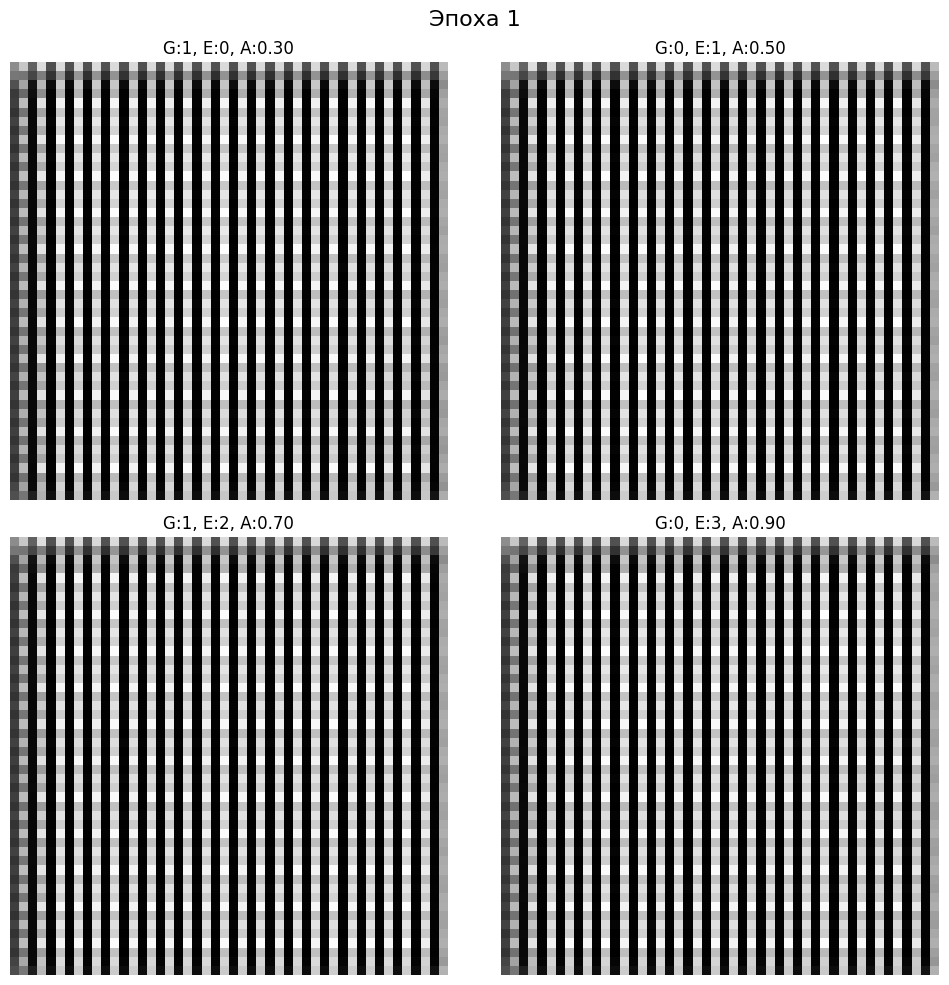

Epoch 1: FID = 1939.01
741/741 ━━━━━━━━━━━━━━━━━━━━ 135s 152ms/step - d_loss: 990.9237 - g_loss: 182.8717
Epoch 2/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - d_loss: 830.3700 - g_loss: 268.8902
Epoch 3/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 669.0011 - g_loss: 181.7673
Epoch 4/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 645.9586 - g_loss: 202.4665
Epoch 5/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 604.9089 - g_loss: 194.4514
Epoch 6/80
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - d_loss: 587.1242 - g_loss: 171.4087Epoch 6: FID = 1193.40
741/741 ━━━━━━━━━━━━━━━━━━━━ 112s 111ms/step - d_loss: 586.3387 - g_loss: 171.1071
Epoch 7/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 71ms/step - d_loss: 577.2424 - g_loss: 161.6340
Epoch 8/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 562.2913 - g_loss: 142.0401
Epoch 9/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 551.1426 - g_loss: 103.5503
Epoch 10/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step

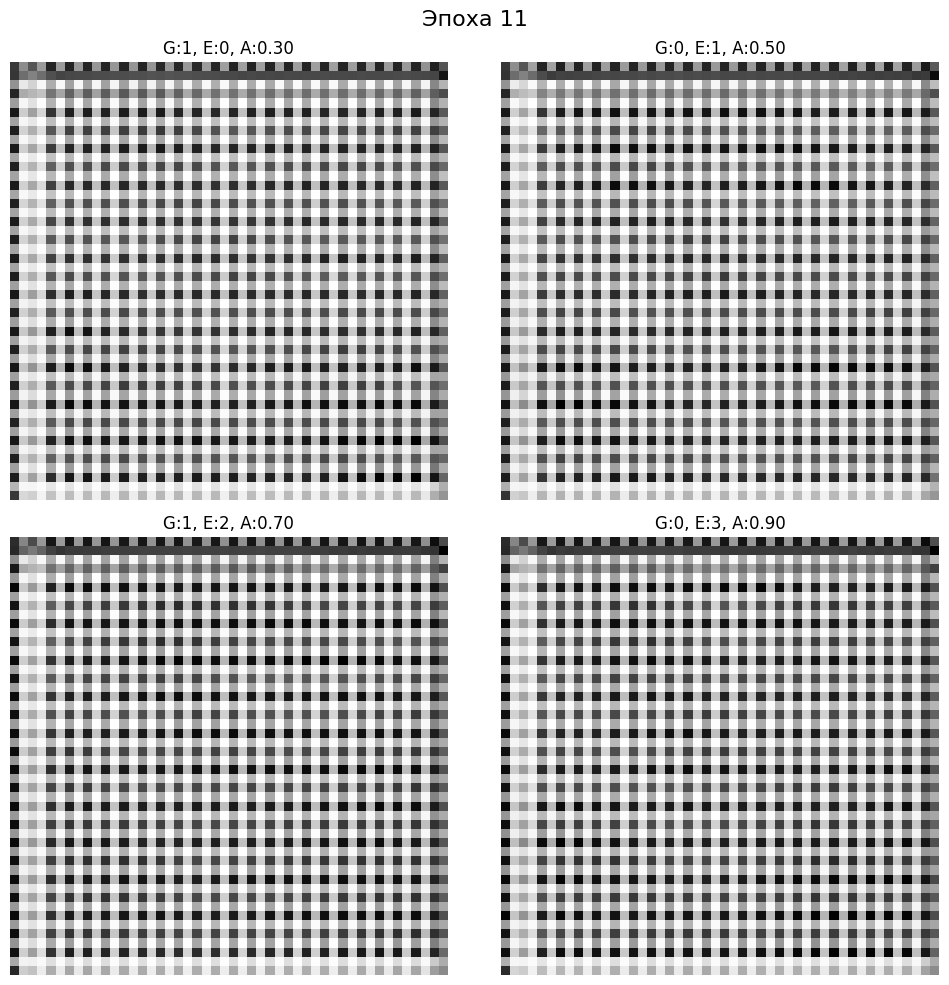

Epoch 11: FID = 2606.76
741/741 ━━━━━━━━━━━━━━━━━━━━ 77s 104ms/step - d_loss: 539.4477 - g_loss: 99.1958
Epoch 12/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 57s 71ms/step - d_loss: 517.1680 - g_loss: 106.7536
Epoch 13/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 527.9167 - g_loss: 79.3148
Epoch 14/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 71ms/step - d_loss: 514.3934 - g_loss: 77.4235
Epoch 15/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 540.2360 - g_loss: 68.9385
Epoch 16/80
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - d_loss: 510.3003 - g_loss: 67.8211Epoch 16: FID = 2601.90
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - d_loss: 509.6099 - g_loss: 67.7210
Epoch 17/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - d_loss: 504.3542 - g_loss: 68.2766
Epoch 18/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 477.3614 - g_loss: 61.3976
Epoch 19/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step - d_loss: 492.0240 - g_loss: 66.5908
Epoch 20/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step 

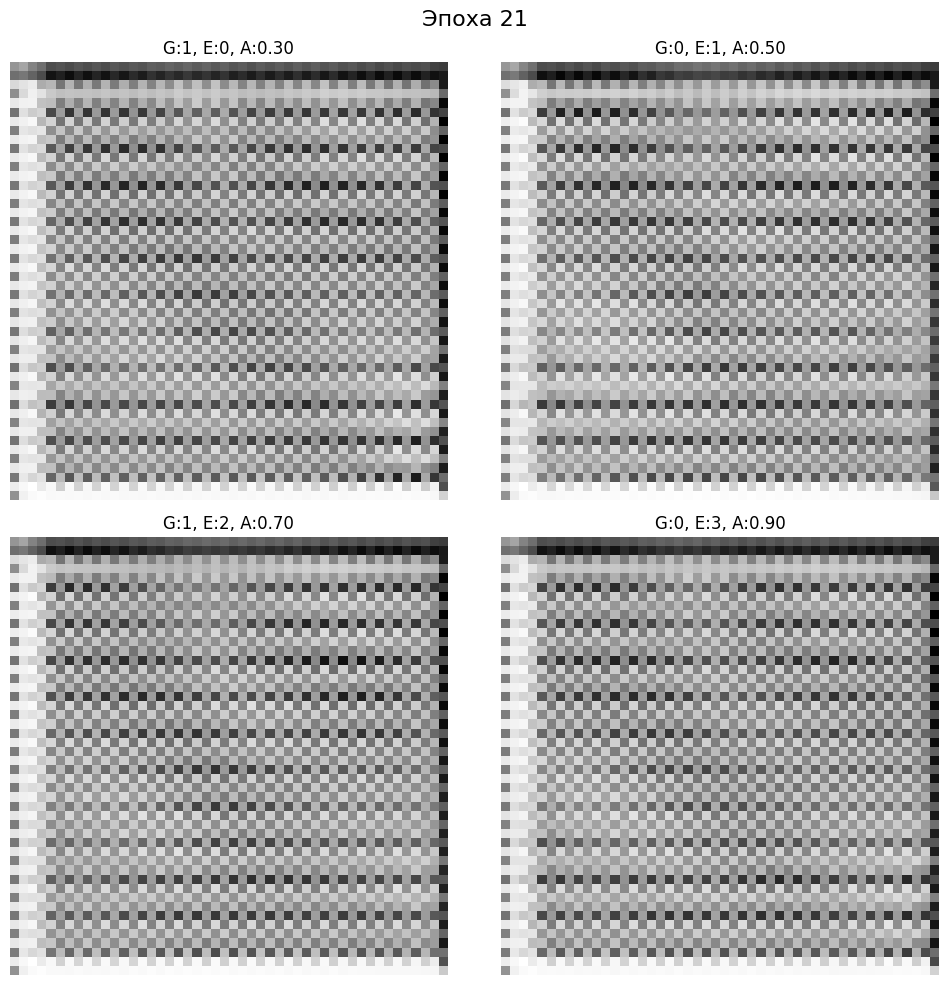

Epoch 21: FID = 1914.79
741/741 ━━━━━━━━━━━━━━━━━━━━ 113s 112ms/step - d_loss: 467.7505 - g_loss: 64.1088
Epoch 22/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - d_loss: 450.9184 - g_loss: 57.8008
Epoch 23/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 456.7003 - g_loss: 64.7811
Epoch 24/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 432.4521 - g_loss: 61.5934
Epoch 25/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 425.5858 - g_loss: 75.0757
Epoch 26/80
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - d_loss: 424.8346 - g_loss: 73.4591Epoch 26: FID = 2136.90
741/741 ━━━━━━━━━━━━━━━━━━━━ 110s 108ms/step - d_loss: 424.2430 - g_loss: 73.3461
Epoch 27/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 54s 71ms/step - d_loss: 412.4922 - g_loss: 65.2529
Epoch 28/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 397.5789 - g_loss: 66.5968
Epoch 29/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 396.5592 - g_loss: 69.9172
Epoch 30/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/ste

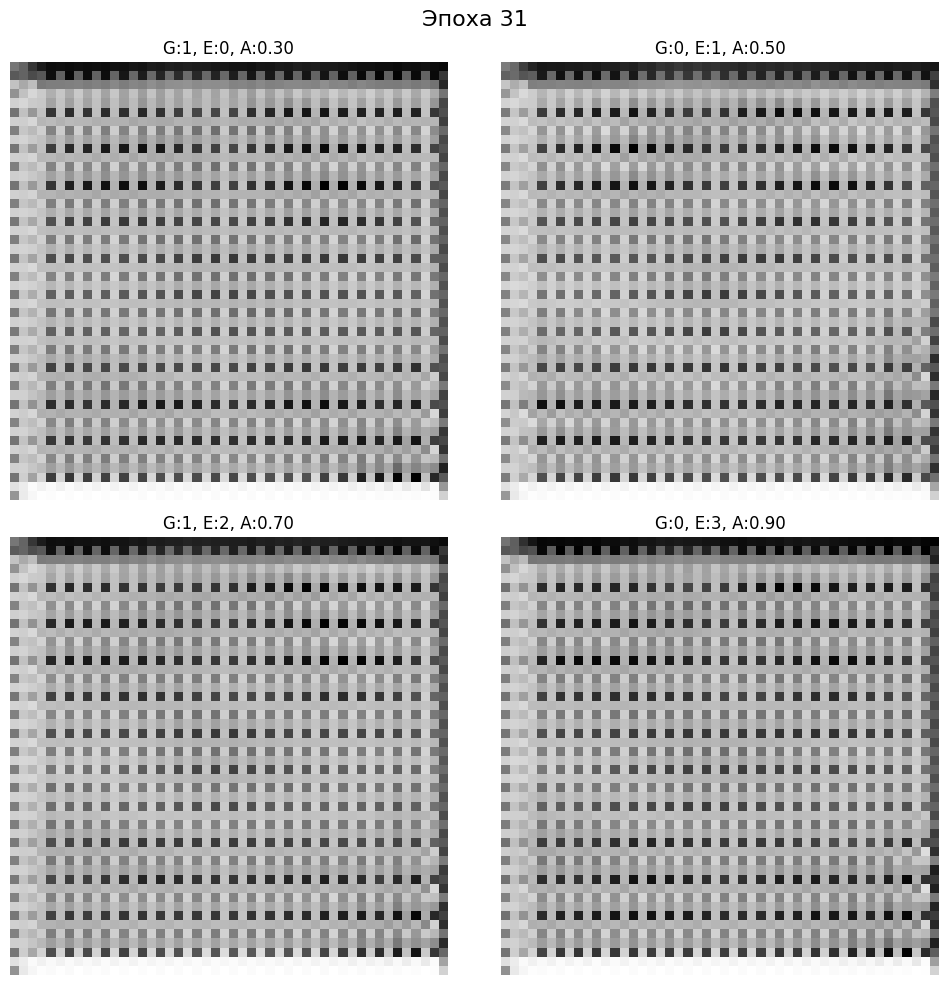

Epoch 31: FID = 1949.94
741/741 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - d_loss: 364.3835 - g_loss: 58.3325
Epoch 32/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - d_loss: 365.6859 - g_loss: 65.6340
Epoch 33/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 357.3593 - g_loss: 66.1400
Epoch 34/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 348.9869 - g_loss: 65.5743
Epoch 35/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step - d_loss: 340.5191 - g_loss: 61.2943
Epoch 36/80
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - d_loss: 341.9810 - g_loss: 64.0850Epoch 36: FID = 1391.77
741/741 ━━━━━━━━━━━━━━━━━━━━ 105s 102ms/step - d_loss: 341.5132 - g_loss: 64.0036
Epoch 37/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - d_loss: 347.8000 - g_loss: 51.6810
Epoch 38/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 336.6400 - g_loss: 51.4569
Epoch 39/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 332.4685 - g_loss: 58.4007
Epoch 40/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 71ms/step 

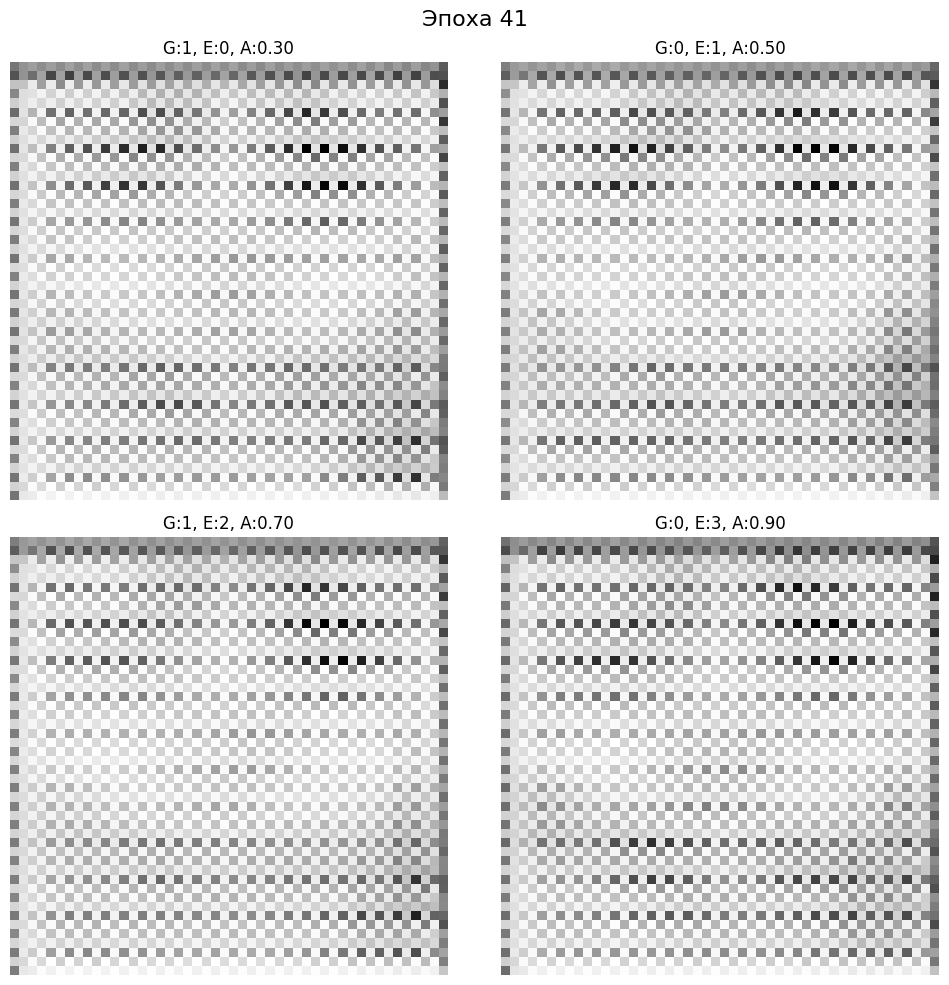

Epoch 41: FID = 1326.40
741/741 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - d_loss: 326.4450 - g_loss: 53.4981
Epoch 42/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - d_loss: 332.1635 - g_loss: 53.7508
Epoch 43/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 329.6449 - g_loss: 49.5676
Epoch 44/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 321.4343 - g_loss: 51.4853
Epoch 45/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 314.5218 - g_loss: 50.9600
Epoch 46/80
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - d_loss: 310.2465 - g_loss: 53.9571Epoch 46: FID = 1818.66
741/741 ━━━━━━━━━━━━━━━━━━━━ 113s 112ms/step - d_loss: 309.8253 - g_loss: 53.8953
Epoch 47/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - d_loss: 311.3924 - g_loss: 48.3602
Epoch 48/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 315.7185 - g_loss: 54.6448
Epoch 49/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 304.7659 - g_loss: 58.8401
Epoch 50/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step

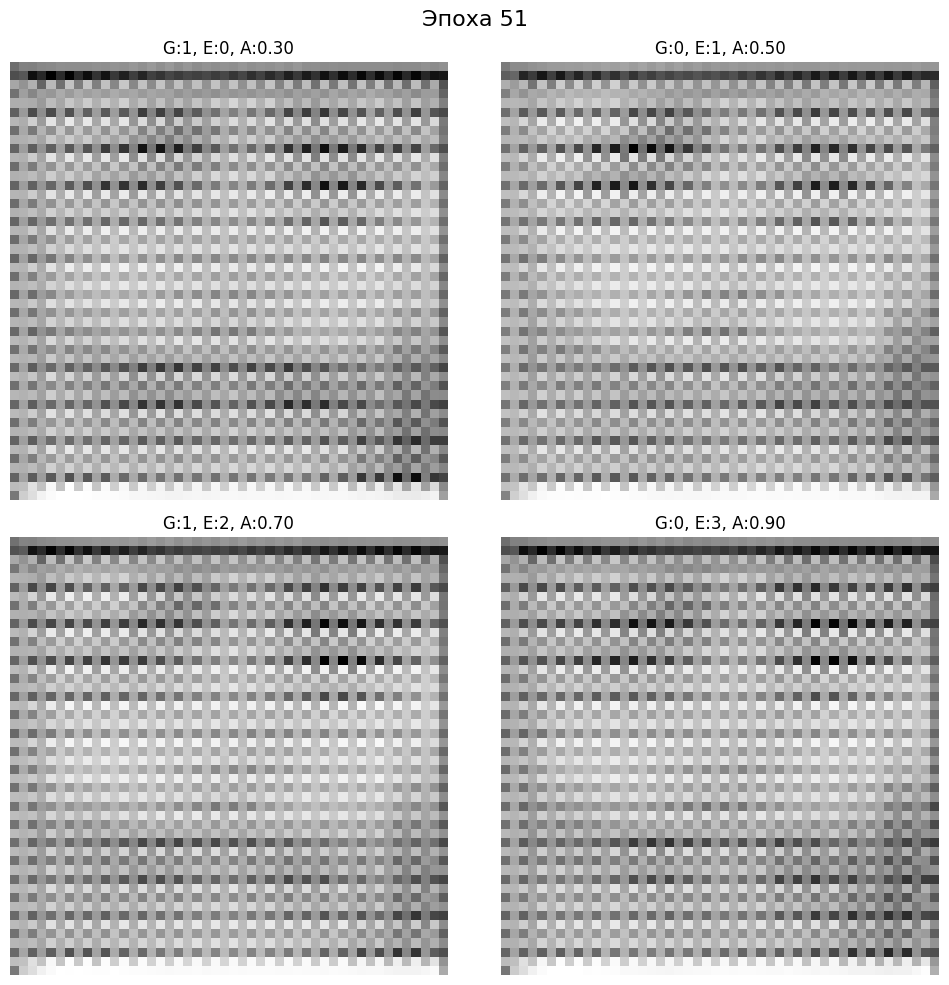

Epoch 51: FID = 2796.45
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - d_loss: 296.8628 - g_loss: 60.2329
Epoch 52/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - d_loss: 285.5022 - g_loss: 62.3534
Epoch 53/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 282.7499 - g_loss: 75.1756
Epoch 54/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 276.4934 - g_loss: 68.1479
Epoch 55/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 272.4438 - g_loss: 65.7429
Epoch 56/80
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - d_loss: 284.1307 - g_loss: 60.9640Epoch 56: FID = 2187.78
741/741 ━━━━━━━━━━━━━━━━━━━━ 114s 113ms/step - d_loss: 283.7406 - g_loss: 60.8838
Epoch 57/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - d_loss: 278.7532 - g_loss: 60.1221
Epoch 58/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 276.2875 - g_loss: 62.8284
Epoch 59/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step - d_loss: 262.4811 - g_loss: 63.5700
Epoch 60/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step

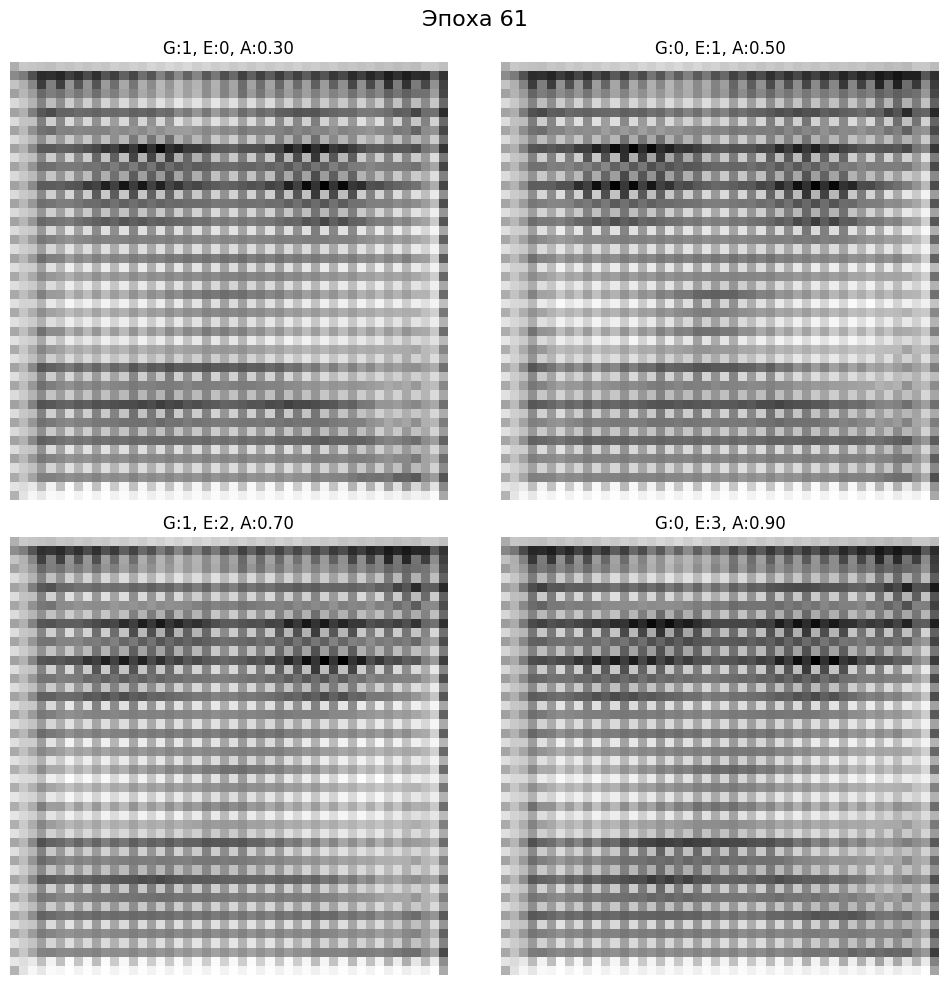

Epoch 61: FID = 2877.12
741/741 ━━━━━━━━━━━━━━━━━━━━ 113s 112ms/step - d_loss: 270.9978 - g_loss: 68.5161
Epoch 62/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - d_loss: 262.0265 - g_loss: 69.8725
Epoch 63/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 267.8889 - g_loss: 70.0906
Epoch 64/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 71ms/step - d_loss: 262.3437 - g_loss: 68.8647
Epoch 65/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 71ms/step - d_loss: 257.8619 - g_loss: 67.6741
Epoch 66/80
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - d_loss: 264.1561 - g_loss: 67.7765Epoch 66: FID = 1640.88
741/741 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - d_loss: 263.7818 - g_loss: 67.6833
Epoch 67/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - d_loss: 257.1784 - g_loss: 61.6106
Epoch 68/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 252.1619 - g_loss: 64.6330
Epoch 69/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - d_loss: 257.5035 - g_loss: 62.0138
Epoch 70/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step

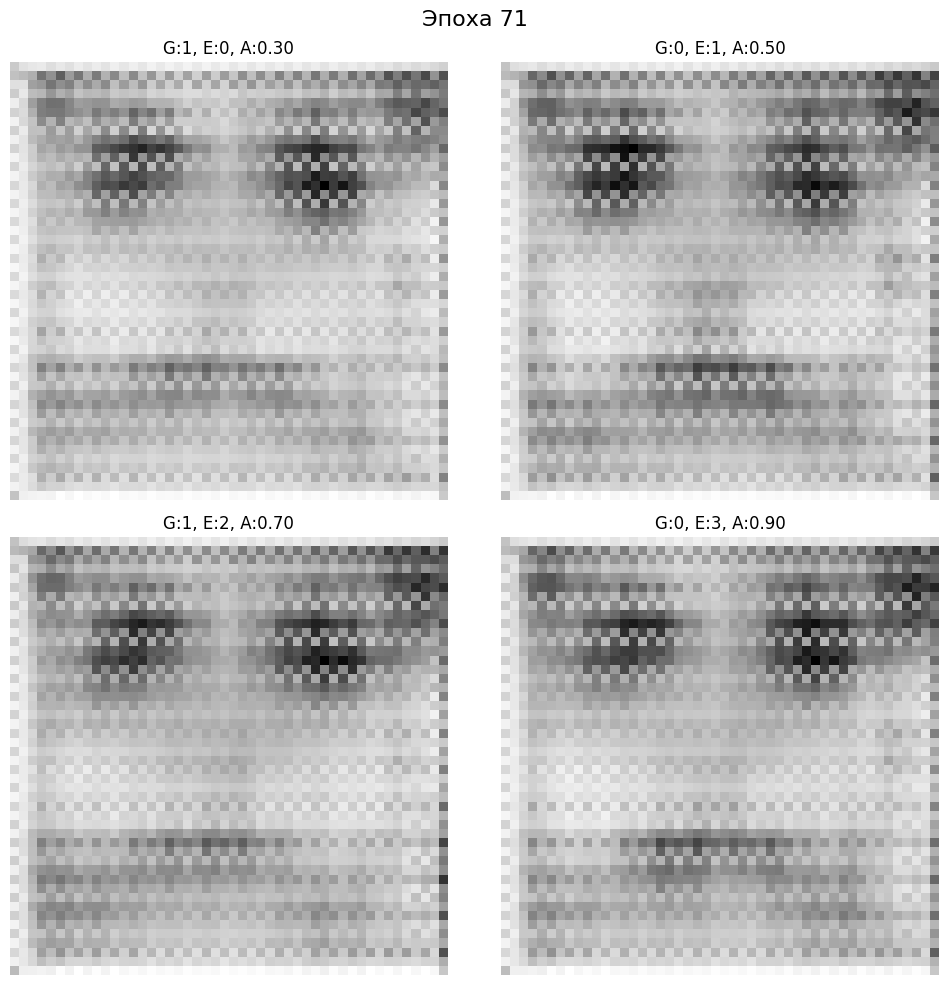

Epoch 71: FID = 1947.98
741/741 ━━━━━━━━━━━━━━━━━━━━ 109s 108ms/step - d_loss: 259.5012 - g_loss: 60.9342
Epoch 72/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - d_loss: 254.5217 - g_loss: 61.9911
Epoch 73/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 71ms/step - d_loss: 253.5924 - g_loss: 51.0652
Epoch 74/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 83s 72ms/step - d_loss: 254.2683 - g_loss: 52.6753
Epoch 75/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 71ms/step - d_loss: 257.0298 - g_loss: 46.7079
Epoch 76/80
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - d_loss: 256.4229 - g_loss: 43.4760Epoch 76: FID = 2557.67
741/741 ━━━━━━━━━━━━━━━━━━━━ 110s 109ms/step - d_loss: 256.0616 - g_loss: 43.4390
Epoch 77/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - d_loss: 255.7811 - g_loss: 44.2209
Epoch 78/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - d_loss: 247.3098 - g_loss: 40.4191
Epoch 79/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step - d_loss: 236.2236 - g_loss: 45.4542
Epoch 80/80
741/741 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step

In [ ]:
# Обучение
print("Начало обучения...")
history = dcgan.fit(dataset, epochs=EPOCHS, callbacks=[gan_monitor], verbose=1)

Визуальный анализ во время обучения показывает явный прогресс в генерации изображений лиц. Так, если после 10-й эпохи кроме шума ничего не генерируется, то после 60-70 эпохи уже явно можно различить силуэт лиц, генерируемых моделью. Но процесс обучения яно не закончен.

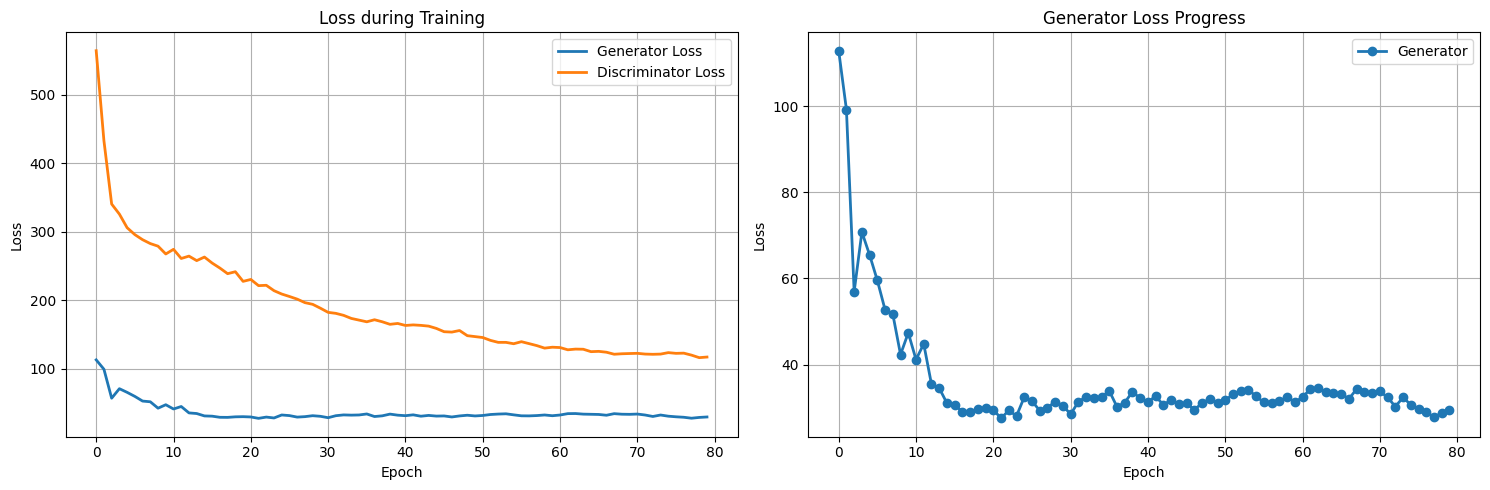

In [ ]:
# Визуализация процесса обучения
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['g_loss'], label='Generator Loss', linewidth=2)
plt.plot(history.history['d_loss'], label='Discriminator Loss', linewidth=2)
plt.title('Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['g_loss'], label='Generator', linewidth=2, marker='o')
plt.title('Generator Loss Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Лосс дискриминатора падает, что является подтверждением, что модель обучается. Хотя до приемлемого результата модель необходимо обучить не менее чем на 1000 эпохах, текущая динамика лоса показывет, что данный процесс идет

Файл с историей FID не найден. FID будет рассчитан сейчас...
Epoch 70: FID = 2296.02
Epoch 71: FID = 2283.29
Epoch 72: FID = 2276.21
Epoch 73: FID = 2290.16
Epoch 74: FID = 2293.25
Epoch 75: FID = 2299.12
Epoch 76: FID = 2289.64
Epoch 77: FID = 2286.07
Epoch 78: FID = 2295.27
Epoch 79: FID = 2287.48


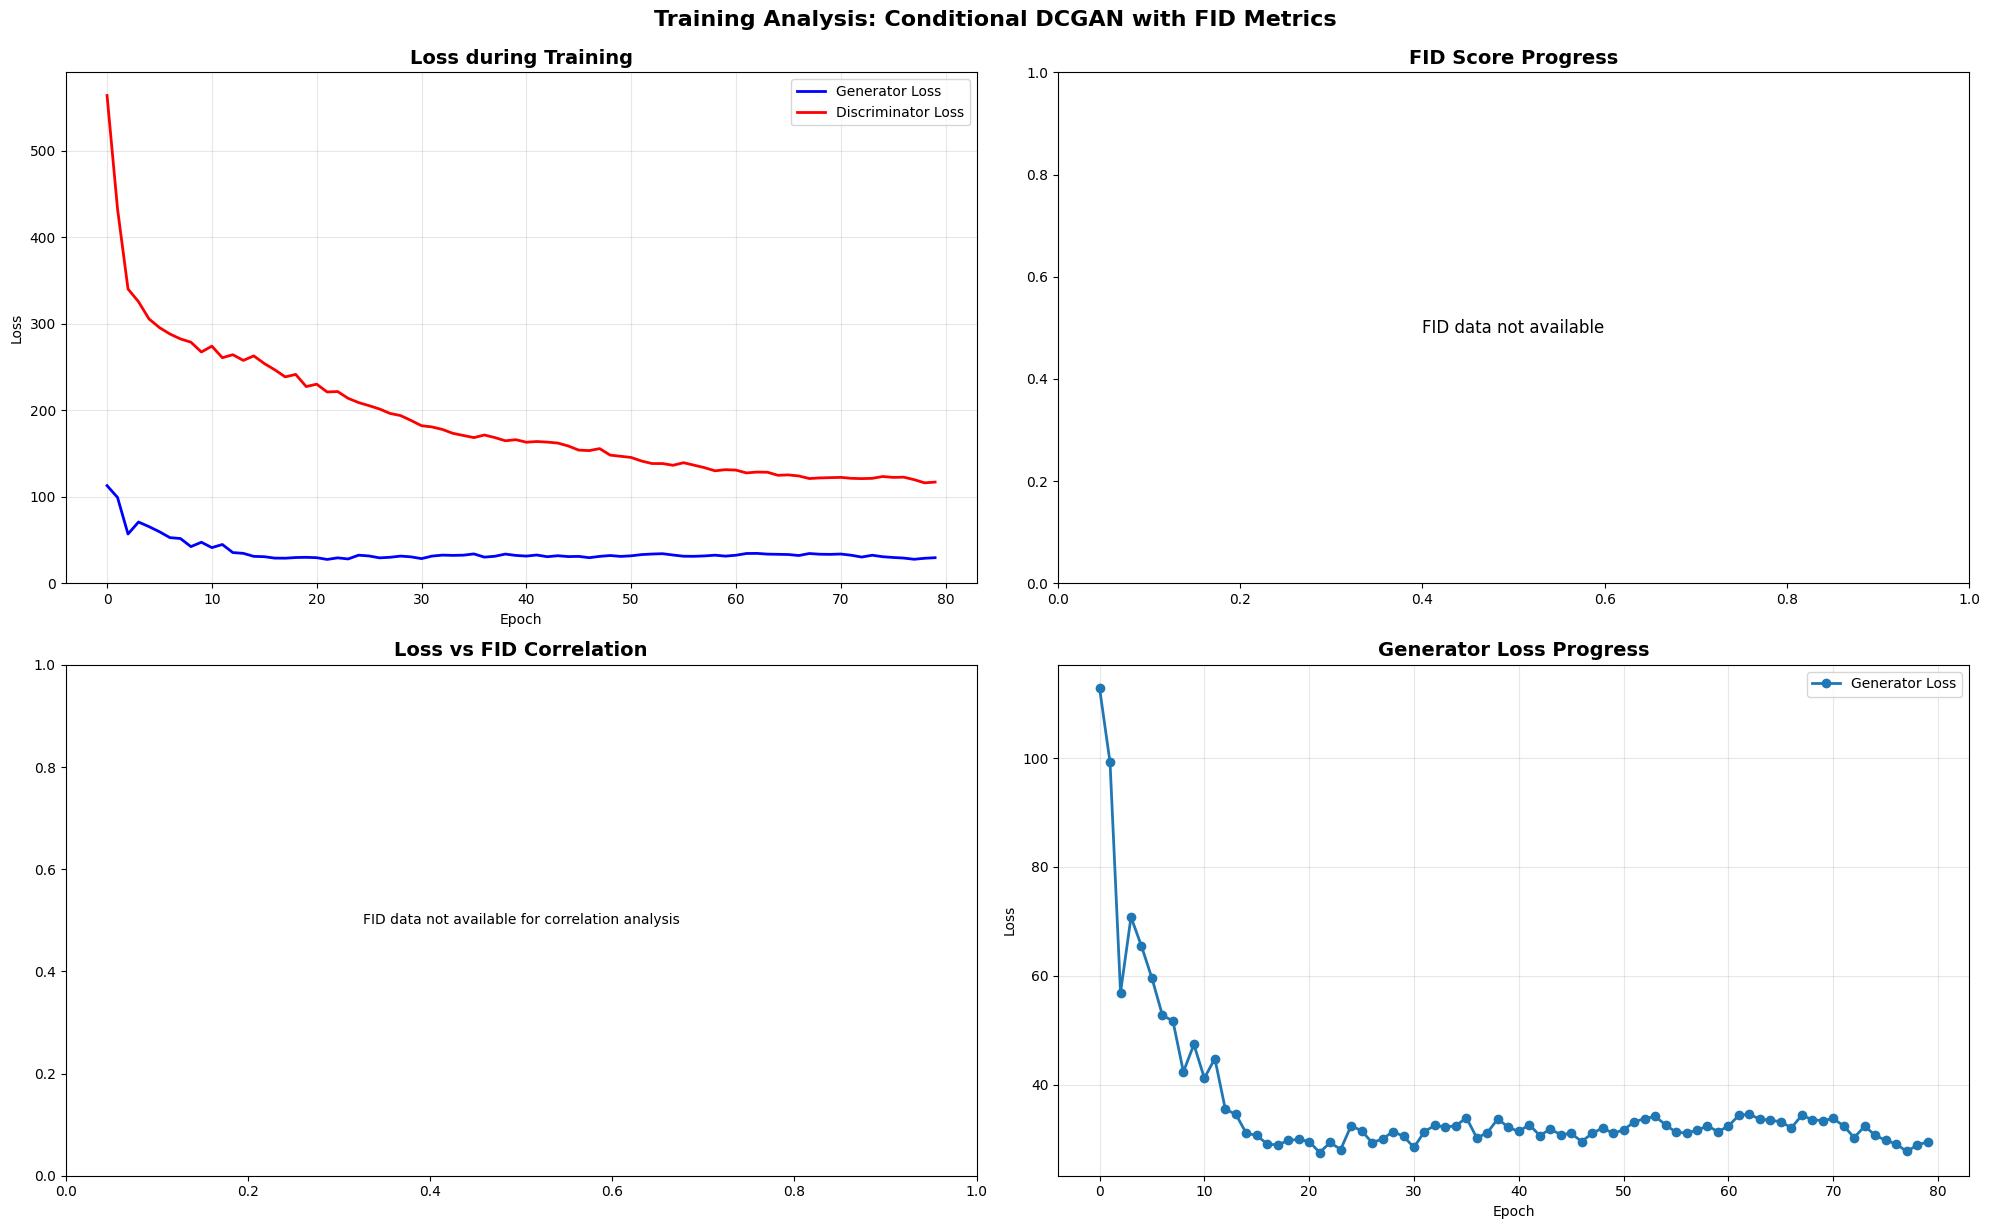

In [ ]:
# Загрузка истории FID если она сохранена
try:
    with open('fid_history.pkl', 'rb') as f:
        fid_history_data = pickle.load(f)
    fid_epochs = fid_history_data['epochs']
    fid_scores = fid_history_data['fid_scores']
    fid_available = True
except FileNotFoundError:
    fid_available = False
    print("Файл с историей FID не найден. FID будет рассчитан сейчас...")

    # Расчет FID для последних 10 эпох если история не сохранена
    fid_epochs = list(range(max(0, EPOCHS - 10), EPOCHS))
    fid_scores = []
    metrics_calculator = GANMetrics(X[:1000])

    for epoch in fid_epochs:
        # Генерация изображений для оценки FID
        noise = tf.random.normal([1000, LATENT_DIM])
        genders = tf.random.uniform([1000, 1], 0, 2, dtype='int32')
        ethnicities = tf.random.uniform([1000, 1], 0, 5, dtype='int32')
        ages = tf.random.uniform([1000, 1], 0.2, 0.8)

        generated_images = generator.predict(
            [noise, genders, ethnicities, ages], verbose=0
        )
        generated_images = (generated_images * 127.5 + 127.5).astype('uint8')

        fid_score = metrics_calculator.calculate_fid(generated_images)
        fid_scores.append(fid_score)
        print(f"Epoch {epoch}: FID = {fid_score:.2f}")

# Создание фигуры с 2x2 субплoтами
plt.figure(figsize=(20, 12))

# Loss during Training
plt.subplot(2, 2, 1)
plt.plot(history.history['g_loss'], label='Generator Loss', linewidth=2, color='blue')
plt.plot(history.history['d_loss'], label='Discriminator Loss', linewidth=2, color='red')
plt.title('Loss during Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(bottom=0)

# FID Score Progress
plt.subplot(2, 2, 2)
if fid_available and len(fid_epochs) > 0:
    # Основной график FID
    line = plt.plot(fid_epochs, fid_scores, 'g-o', linewidth=3, markersize=6,
                   label='FID Score', markerfacecolor='white', markeredgewidth=2)

    # Добавляем зоны качества FID
    plt.axhspan(0, 50, alpha=0.2, color='green', label='Excellent (FID < 50)')
    plt.axhspan(50, 100, alpha=0.2, color='blue', label='Good (50-100)')
    plt.axhspan(100, 200, alpha=0.2, color='orange', label='Fair (100-200)')
    plt.axhspan(200, max(fid_scores) * 1.1 if fid_scores else 300, alpha=0.2, color='red', label='Poor (>200)')

    # Аннотация последнего значения
    last_fid = fid_scores[-1]
    last_epoch = fid_epochs[-1]
    plt.annotate(f'{last_fid:.1f}',
                xy=(last_epoch, last_fid),
                xytext=(last_epoch, last_fid + max(fid_scores)*0.1),
                arrowprops=dict(arrowstyle='->', color='green'),
                fontsize=12, fontweight='bold', color='green')

    plt.title('FID Score Progress', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('FID Score')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)

    # Добавляем вторую ось Y для процентного улучшения
    if len(fid_scores) > 1:
        ax2 = plt.gca().twinx()
        improvement = [(fid_scores[i-1] - fid_scores[i])/fid_scores[i-1]*100
                      for i in range(1, len(fid_scores))]
        ax2.plot(fid_epochs[1:], improvement, 'm--', linewidth=2, marker='s',
                markersize=4, label='Improvement %')
        ax2.set_ylabel('Improvement (%)', color='m')
        ax2.tick_params(axis='y', labelcolor='m')
        ax2.legend(loc='center right')
else:
    plt.text(0.5, 0.5, 'FID data not available', horizontalalignment='center',
            verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('FID Score Progress', fontsize=14, fontweight='bold')

# Combined Analysis: Loss vs FID correlation
plt.subplot(2, 2, 3)
if fid_available and len(fid_epochs) > 0:
    # Находим общие эпохи для сравнения
    common_epochs = [epoch for epoch in fid_epochs if epoch < len(history.history['g_loss'])]

    if common_epochs:
        # Берем соответствующие значения loss и FID
        gen_loss_values = [history.history['g_loss'][epoch] for epoch in common_epochs]
        fid_values = [fid_scores[fid_epochs.index(epoch)] for epoch in common_epochs]

        # Scatter plot с цветовой кодировкой по эпохам
        scatter = plt.scatter(gen_loss_values, fid_values, c=common_epochs,
                             cmap='viridis', s=100, alpha=0.7)

        # Добавляем трендовую линию
        z = np.polyfit(gen_loss_values, fid_values, 1)
        p = np.poly1d(z)
        plt.plot(gen_loss_values, p(gen_loss_values), "r--", alpha=0.8,
                label=f'Trend: y = {z[0]:.1f}x + {z[1]:.1f}')

        # Аннотации для некоторых точек
        for i, epoch in enumerate(common_epochs[::max(1, len(common_epochs)//4)]):
            idx = common_epochs.index(epoch)
            plt.annotate(f'E{epoch}',
                        (gen_loss_values[idx], fid_values[idx]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.7)

        plt.colorbar(scatter, label='Epoch')
        plt.xlabel('Generator Loss')
        plt.ylabel('FID Score')
        plt.title('Generator Loss vs FID Correlation', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Добавляем коэффициент корреляции
        correlation = np.corrcoef(gen_loss_values, fid_values)[0, 1]
        plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}',
                transform=plt.gca().transAxes, fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    else:
        plt.text(0.5, 0.5, 'No common epochs for comparison',
                horizontalalignment='center', verticalalignment='center',
                transform=plt.gca().transAxes, fontsize=12)
        plt.title('Loss vs FID Correlation', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'FID data not available for correlation analysis',
            horizontalalignment='center', verticalalignment='center',
            transform=plt.gca().transAxes, fontsize=10)
    plt.title('Loss vs FID Correlation', fontsize=14, fontweight='bold')

# Generator Loss Progress (вместо Validation Loss)
plt.subplot(2, 2, 4)
plt.plot(history.history['g_loss'], label='Generator Loss', linewidth=2, marker='o')
plt.title('Generator Loss Progress', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Training Analysis: Conditional DCGAN with FID Metrics',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Дополнительная визуализация: детальный анализ FID
if fid_available and len(fid_scores) > 1:
    print(f"\nFID Analysis Summary:")
    print(f"Initial FID: {fid_scores[0]:.2f}")
    print(f"Final FID: {fid_scores[-1]:.2f}")
    print(f"Improvement: {fid_scores[0] - fid_scores[-1]:.2f} ({((fid_scores[0] - fid_scores[-1])/fid_scores[0]*100):.1f}%)")

    # Дополнительный график: улучшение FID по эпохам
    plt.figure(figsize=(10, 6))

    improvements = [fid_scores[0] - fid for fid in fid_scores]
    cumulative_improvement = [sum(improvements[:i+1]) for i in range(len(improvements))]

    plt.subplot(1, 2, 1)
    plt.bar(fid_epochs, improvements, alpha=0.7, color='skyblue', label='Epoch Improvement')
    plt.plot(fid_epochs, improvements, 'ro-', linewidth=2, markersize=6, label='Improvement Trend')
    plt.xlabel('Epoch')
    plt.ylabel('FID Improvement')
    plt.title('FID Improvement per Epoch')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(fid_epochs, cumulative_improvement, 'g-s', linewidth=3, markersize=8,
            label='Cumulative Improvement')
    plt.fill_between(fid_epochs, cumulative_improvement, alpha=0.2, color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Cumulative FID Improvement')
    plt.title('Cumulative FID Improvement')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Финальная оценка качества по FID
if fid_available:
    final_fid = fid_scores[-1]
    print(f"\n{'='*60}")
    print("FINAL FID EVALUATION:")
    print(f"{'='*60}")

    if final_fid < 30:
        rating = "⭐️⭐️⭐️⭐️⭐️ ОТЛИЧНО!"
        color = "\033[92m"  # green
    elif final_fid < 50:
        rating = "⭐️⭐️⭐️⭐️ ОЧЕНЬ ХОРОШО"
        color = "\033[94m"  # blue
    elif final_fid < 100:
        rating = "⭐️⭐️⭐️ ХОРОШО"
        color = "\033[93m"  # yellow
    elif final_fid < 200:
        rating = "⭐️⭐️ УДОВЛЕТВОРИТЕЛЬНО"
        color = "\033[33m"  # orange
    else:
        rating = "⭐️ ТРЕБУЕТ ДОРАБОТКИ"
        color = "\033[91m"  # red

    print(f"{color}FID Score: {final_fid:.2f} - {rating}\033[0m")
    print(f"{'='*60}")

In [ ]:
# Генерация изображений для анализа
num_samples = 1000
noise = tf.random.normal([num_samples, LATENT_DIM])
genders = tf.random.uniform([num_samples, 1], 0, 2, dtype='int32')
ethnicities = tf.random.uniform([num_samples, 1], 0, 5, dtype='int32')
ages = tf.random.uniform([num_samples, 1], 0.2, 0.8)

generated_images = generator.predict([noise, genders, ethnicities, ages], verbose=0)
generated_images = (generated_images * 127.5 + 127.5).astype('uint8')

In [ ]:
# Функция для визуализации распределения в пространстве признаков
def visualize_feature_space(real_images, generated_images, title="Распределение в пространстве признаков"):
    """
    Визуализация реальных и сгенерированных изображений в пространстве признаков
    с использованием PCA и t-SNE
    """
    # Используем InceptionV3 для извлечения признаков
    inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(128, 128, 3))
    inception_model.trainable = False

    # Предобработка изображений
    def preprocess_images(images):
        if images.shape[-1] == 1:
            images = np.repeat(images, 3, axis=-1)

        resized_images = []
        for img in images:
            img_resized = cv2.resize(img, (128, 128))
            resized_images.append(img_resized)

        images = np.array(resized_images)
        return preprocess_input(images.astype('float32'))

    # Подготовка данных
    real_processed = preprocess_images(real_images[:1000])  # Используем подмножество
    gen_processed = preprocess_images(generated_images[:1000])

    # Извлечение признаков
    real_features = inception_model.predict(real_processed, verbose=0)
    gen_features = inception_model.predict(gen_processed, verbose=0)

    # Объединение признаков
    all_features = np.vstack([real_features, gen_features])
    labels = np.array(['Реальные'] * len(real_features) + ['Сгенерированные'] * len(gen_features))

    # Преобразуем строковые метки в числовые коды
    label_codes = np.array([0] * len(real_features) + [1] * len(gen_features))

    # PCA визуализация
    print("Выполнение PCA...")
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(all_features)

    # t-SNE визуализация
    print("Выполнение t-SNE...")
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    tsne_result = tsne.fit_transform(all_features)

    # Создание графиков
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # PCA plot
    scatter_pca = axes[0].scatter(pca_result[:, 0], pca_result[:, 1],
                                 c=label_codes, cmap='viridis', alpha=0.6, s=30)
    axes[0].set_title('PCA: Пространство признаков', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Главная компонента 1')
    axes[0].set_ylabel('Главная компонента 2')
    axes[0].grid(True, alpha=0.3)

    # Легенда для PCA
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Реальные'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Сгенерированные')]
    axes[0].legend(handles=legend_elements, loc='best')

    # t-SNE plot
    scatter_tsne = axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1],
                                  c=label_codes, cmap='viridis', alpha=0.6, s=30)
    axes[1].set_title('t-SNE: Пространство признаков', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('t-SNE dimension 1')
    axes[1].set_ylabel('t-SNE dimension 2')
    axes[1].grid(True, alpha=0.3)

    # Легенда для t-SNE
    axes[1].legend(handles=legend_elements, loc='best')

    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Дополнительная статистика
    print("\n" + "="*60)
    print("СТАТИСТИКА РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ")
    print("="*60)

    # Расстояние между центрами распределений
    real_center = np.mean(real_features, axis=0)
    gen_center = np.mean(gen_features, axis=0)
    center_distance = np.linalg.norm(real_center - gen_center)
    print(f"Расстояние между центрами распределений: {center_distance:.4f}")

    # Диаметр распределений
    real_diameter = np.max(np.linalg.norm(real_features - real_center, axis=1))
    gen_diameter = np.max(np.linalg.norm(gen_features - gen_center, axis=1))
    print(f"Диаметр реального распределения: {real_diameter:.4f}")
    print(f"Диаметр сгенерированного распределения: {gen_diameter:.4f}")

    # Перекрытие распределений (процент точек в общих областях)
    from sklearn.neighbors import NearestNeighbors
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(real_features)
    distances, _ = nn.kneighbors(gen_features)
    overlap_threshold = np.percentile(distances, 50)  # Медианное расстояние
    overlap_percentage = np.mean(distances < overlap_threshold) * 100
    print(f"Перекрытие распределений: {overlap_percentage:.2f}%")

    return pca_result, tsne_result, real_features, gen_features

Визуализация распределения реальных vs сгенерированных изображений...
Выполнение PCA...
Выполнение t-SNE...


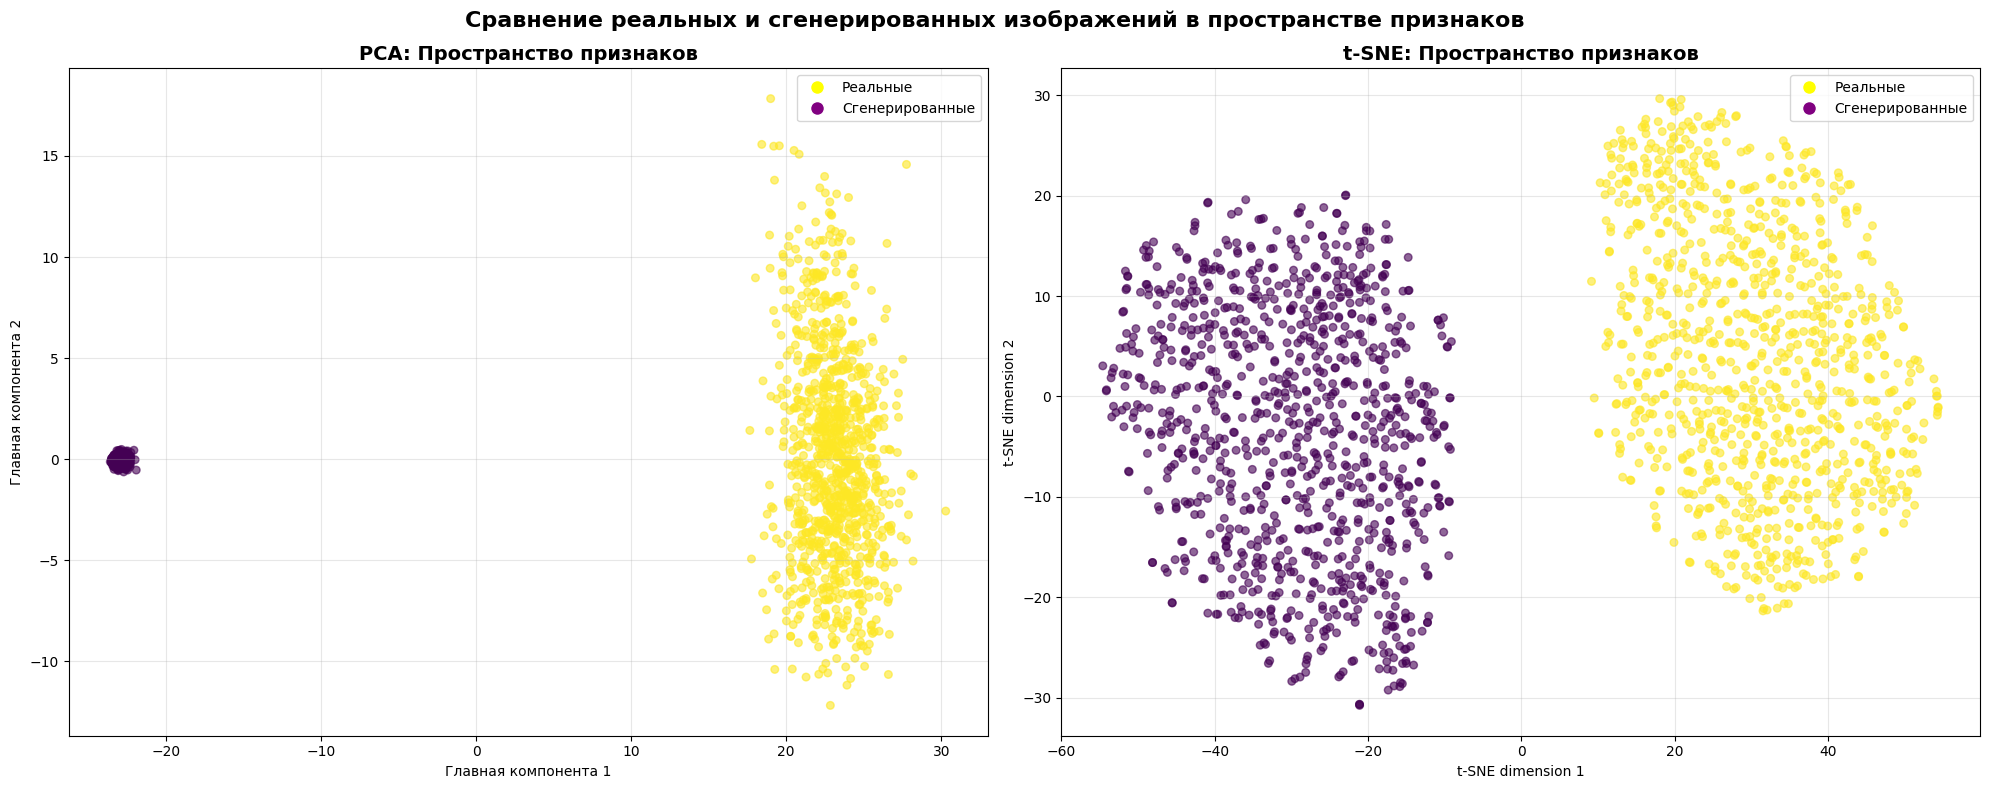


СТАТИСТИКА РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ
Расстояние между центрами распределений: 46.1197
Диаметр реального распределения: 10.0696
Диаметр сгенерированного распределения: 23.1265
Перекрытие распределений: 50.00%


In [ ]:
# Визуализация распределения в пространстве признаков
print("Визуализация распределения реальных vs сгенерированных изображений...")
pca_result, tsne_result, real_features, gen_features = visualize_feature_space(
    X[:1000], generated_images, "Сравнение реальных и сгенерированных изображений в пространстве признаков"
)

In [ ]:
# Функция для анализа кластеризации по атрибутам
def analyze_attribute_clusters(generator, num_samples=1000):
    """
    Анализ кластеризации по различным атрибутам
    """
    # Генерация изображений с разными атрибутами
    noise = tf.random.normal([num_samples, LATENT_DIM])

    # Случайные атрибуты
    genders = tf.random.uniform([num_samples, 1], 0, 2, dtype='int32')
    ethnicities = tf.random.uniform([num_samples, 1], 0, 5, dtype='int32')
    ages = tf.random.uniform([num_samples, 1], 0.2, 0.8)

    generated_images = generator.predict([noise, genders, ethnicities, ages], verbose=0)
    generated_images = (generated_images * 127.5 + 127.5).astype('uint8')

    # Извлечение признаков
    inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(128, 128, 3))

    # Предобработка
    processed_images = []
    for img in generated_images:
        if img.shape[-1] == 1:
            img = np.repeat(img, 3, axis=-1)
        img_resized = cv2.resize(img, (128, 128))
        processed_images.append(img_resized)

    processed_images = np.array(processed_images)
    processed_images = preprocess_input(processed_images.astype('float32'))

    features = inception_model.predict(processed_images, verbose=0)

    # PCA для визуализации
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features)

    # Визуализация по разным атрибутам
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # По полу
    scatter_gender = axes[0, 0].scatter(pca_result[:, 0], pca_result[:, 1],
                                       c=genders.numpy().flatten(), cmap='coolwarm', alpha=0.6, s=30)
    axes[0, 0].set_title('Кластеризация по полу (0=М, 1=Ж)', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('PC1')
    axes[0, 0].set_ylabel('PC2')
    plt.colorbar(scatter_gender, ax=axes[0, 0])

    # По этносу
    scatter_ethnicity = axes[0, 1].scatter(pca_result[:, 0], pca_result[:, 1],
                                          c=ethnicities.numpy().flatten(), cmap='tab10', alpha=0.6, s=30)
    axes[0, 1].set_title('Кластеризация по этносу (0-4)', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('PC1')
    axes[0, 1].set_ylabel('PC2')
    plt.colorbar(scatter_ethnicity, ax=axes[0, 1])

    # По возрасту
    scatter_age = axes[1, 0].scatter(pca_result[:, 0], pca_result[:, 1],
                                    c=ages.numpy().flatten(), cmap='viridis', alpha=0.6, s=30)
    axes[1, 0].set_title('Кластеризация по возрасту', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('PC1')
    axes[1, 0].set_ylabel('PC2')
    plt.colorbar(scatter_age, ax=axes[1, 0])

    # 3D визуализация
    from mpl_toolkits.mplot3d import Axes3D
    pca_3d = PCA(n_components=3)
    pca_3d_result = pca_3d.fit_transform(features)

    ax_3d = fig.add_subplot(2, 2, 4, projection='3d')
    scatter_3d = ax_3d.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2],
                              c=ethnicities.numpy().flatten(), cmap='tab10', alpha=0.6, s=20)
    ax_3d.set_title('3D PCA: Кластеризация по этносу', fontsize=12, fontweight='bold')
    ax_3d.set_xlabel('PC1')
    ax_3d.set_ylabel('PC2')
    ax_3d.set_zlabel('PC3')
    plt.colorbar(scatter_3d, ax=ax_3d)

    plt.suptitle('Анализ кластеризации сгенерированных изображений по атрибутам',
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return features, pca_result

Анализ кластеризации по атрибутам...


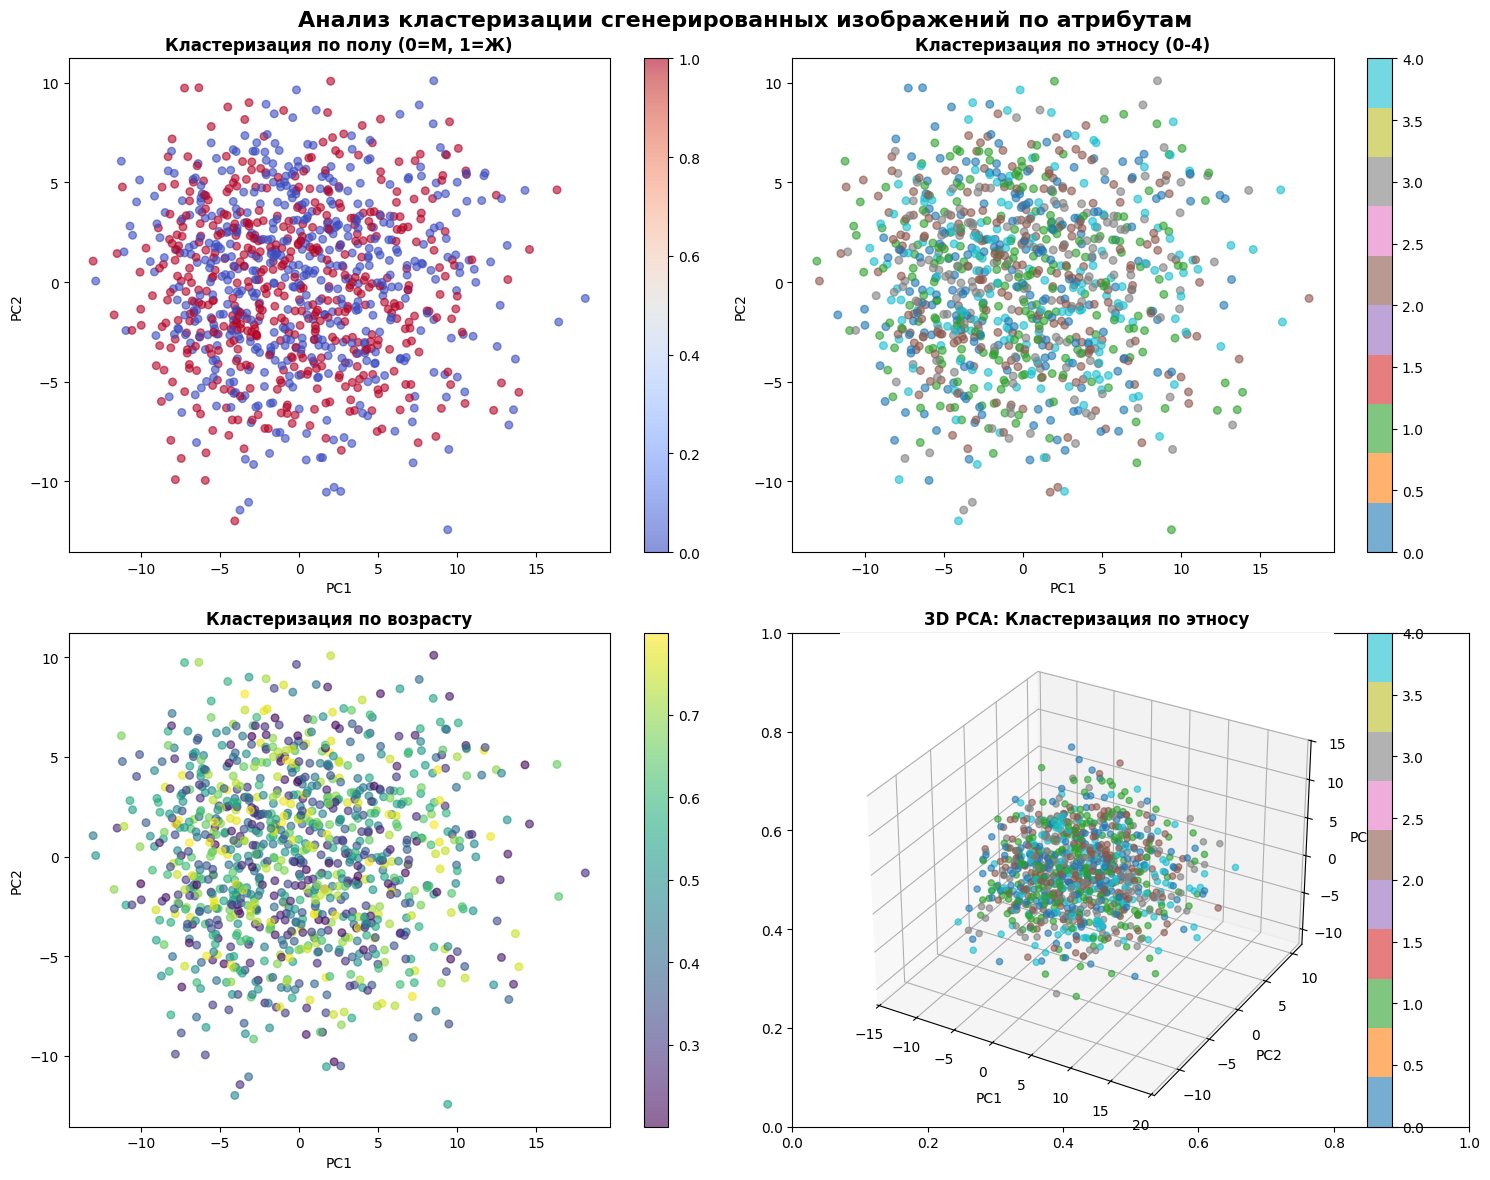

In [ ]:
# Анализ кластеризации по атрибутам
print("Анализ кластеризации по атрибутам...")
features, pca_attr_result = analyze_attribute_clusters(generator, num_samples=1000)

In [ ]:
# Функция для сравнения распределений признаков
def compare_feature_distributions(real_features, gen_features):
    """
    Сравнение распределений признаков реальных и сгенерированных изображений
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Гистограммы первых 4 признаков
    for i in range(4):
        ax = axes[i//2, i%2]
        ax.hist(real_features[:, i], alpha=0.7, bins=30, label='Реальные', density=True)
        ax.hist(gen_features[:, i], alpha=0.7, bins=30, label='Сгенерированные', density=True)
        ax.set_title(f'Распределение признака {i+1}')
        ax.set_xlabel('Значение признака')
        ax.set_ylabel('Плотность')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.suptitle('Сравнение распределений признаков', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Статистика распределений
    print("\n" + "="*60)
    print("СТАТИСТИКА СРАВНЕНИЯ РАСПРЕДЕЛЕНИЙ")
    print("="*60)

    for i in range(4):
        real_mean = np.mean(real_features[:, i])
        gen_mean = np.mean(gen_features[:, i])
        real_std = np.std(real_features[:, i])
        gen_std = np.std(gen_features[:, i])

        print(f"Признак {i+1}:")
        print(f"  Реальные: μ={real_mean:.4f}, σ={real_std:.4f}")
        print(f"  Сгенерированные: μ={gen_mean:.4f}, σ={gen_std:.4f}")
        print(f"  Разница средних: {abs(real_mean - gen_mean):.4f}")
        print(f"  Отношение std: {real_std/gen_std:.4f}")
        print()

Сравнение распределений признаков...


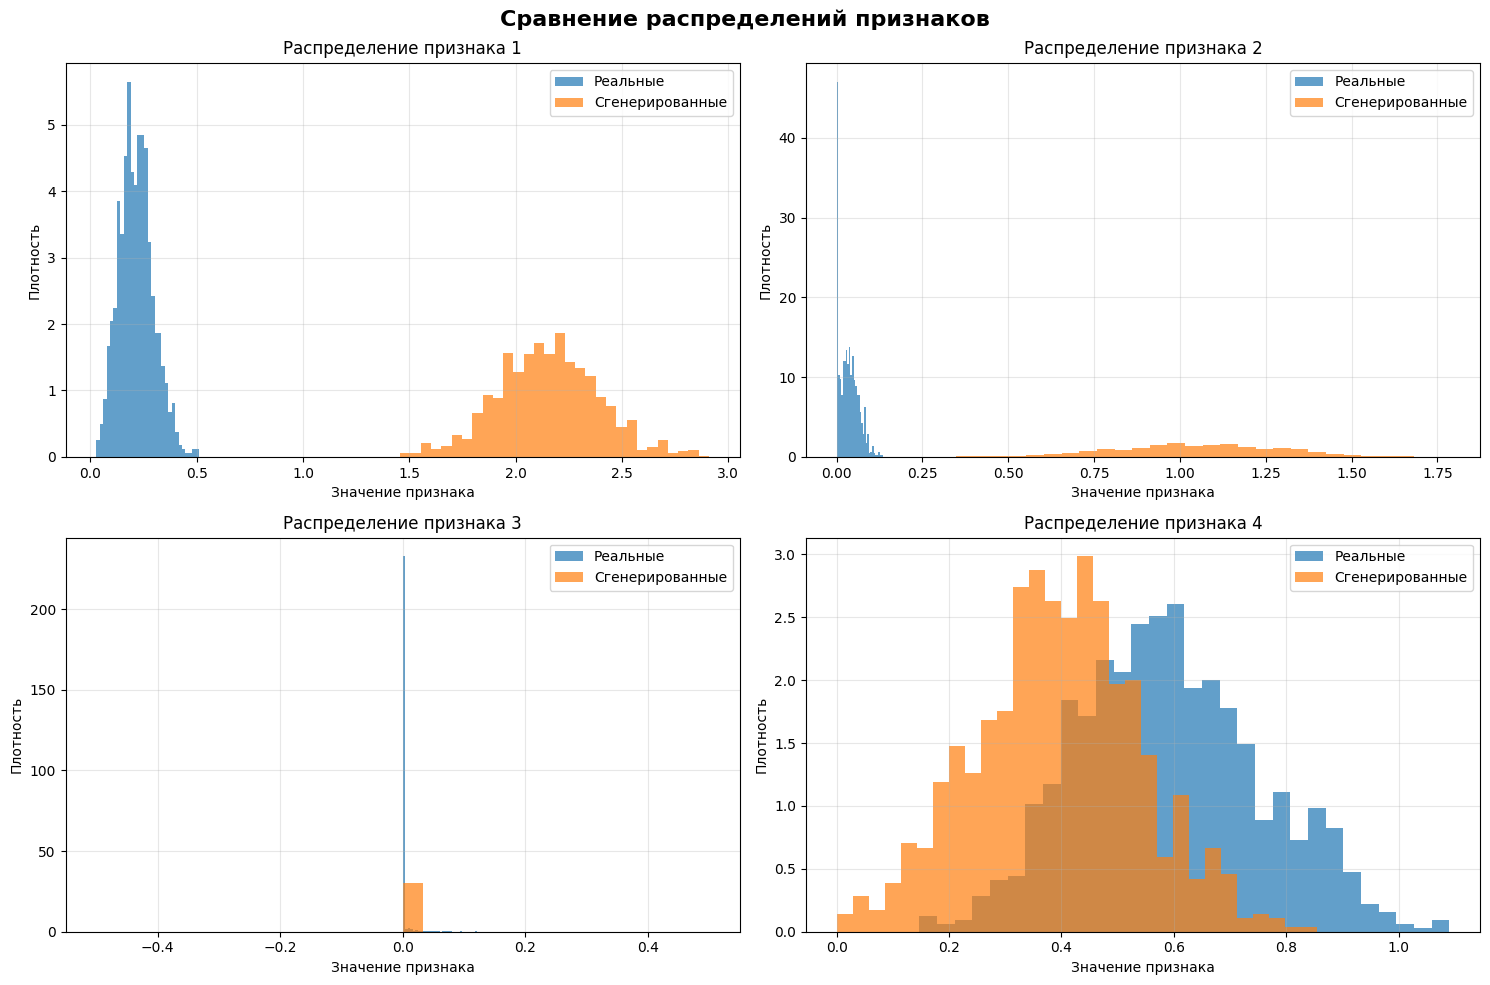


СТАТИСТИКА СРАВНЕНИЯ РАСПРЕДЕЛЕНИЙ
Признак 1:
  Реальные: μ=0.2155, σ=0.0802
  Сгенерированные: μ=2.1522, σ=0.2400
  Разница средних: 1.9367
  Отношение std: 0.3344

Признак 2:
  Реальные: μ=0.0337, σ=0.0277
  Сгенерированные: μ=1.0410, σ=0.2559
  Разница средних: 1.0072
  Отношение std: 0.1083

Признак 3:
  Реальные: μ=0.0018, σ=0.0095
  Сгенерированные: μ=0.0000, σ=0.0000
  Разница средних: 0.0018
  Отношение std: inf

Признак 4:
  Реальные: μ=0.5910, σ=0.1642
  Сгенерированные: μ=0.3930, σ=0.1456
  Разница средних: 0.1981
  Отношение std: 1.1281



In [ ]:
# Сравнение распределений признаков
print("Сравнение распределений признаков...")
compare_feature_distributions(real_features, gen_features)

In [ ]:
# Функция анализа расстояний между кластерами атрибутов
def analyze_inter_cluster_distances(features, ethnicities, genders, ages):
    """Анализ расстояний между кластерами разных атрибутов"""

    # Средние векторы для каждого этноса
    ethnicity_means = []
    for eth in range(5):
        mask = (ethnicities.numpy().flatten() == eth)
        if np.sum(mask) > 0:
            ethnicity_means.append(np.mean(features[mask], axis=0))
        else:
            ethnicity_means.append(np.zeros(features.shape[1]))

    # Матрица расстояний между этносами
    ethnicity_distances = np.zeros((5, 5))
    for i in range(5):
        for j in range(5):
            ethnicity_distances[i, j] = np.linalg.norm(ethnicity_means[i] - ethnicity_means[j])

    # Визуализация матрицы расстояний
    plt.figure(figsize=(10, 8))
    im = plt.imshow(ethnicity_distances, cmap='YlOrRd', interpolation='nearest')
    plt.colorbar(im, label='Евклидово расстояние')
    plt.title('Матрица расстояний между кластерами этносов', fontsize=14, fontweight='bold')
    plt.xlabel('Этнос')
    plt.ylabel('Этнос')
    plt.xticks(range(5))
    plt.yticks(range(5))

    # Добавление значений в ячейки
    for i in range(5):
        for j in range(5):
            plt.text(j, i, f'{ethnicity_distances[i, j]:.2f}',
                    ha='center', va='center', fontweight='bold',
                    color='white' if ethnicity_distances[i, j] > np.max(ethnicity_distances)/2 else 'black')

    plt.tight_layout()
    plt.show()

    return ethnicity_distances

Анализ расстояний между кластерами атрибутов...


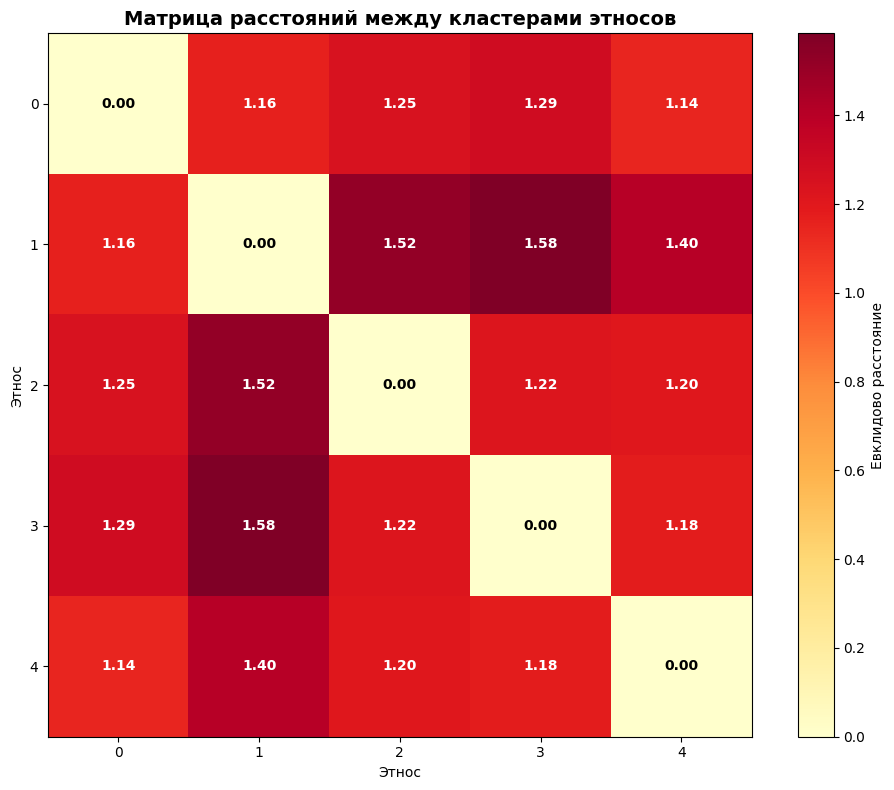

In [ ]:
# Анализ расстояний
print("Анализ расстояний между кластерами атрибутов...")
ethnicity_distances = analyze_inter_cluster_distances(features, ethnicities, genders, ages)

In [ ]:
def evaluate_final_fid(generator, real_images, num_samples=1000):
    """Расчет финального FID score"""
    metrics_calculator = GANMetrics(real_images)

    # Генерация изображений
    noise = tf.random.normal([num_samples, LATENT_DIM])
    genders = tf.random.uniform([num_samples, 1], 0, 2, dtype='int32')
    ethnicities = tf.random.uniform([num_samples, 1], 0, 5, dtype='int32')
    ages = tf.random.uniform([num_samples, 1], 0.2, 0.8)

    generated_images = generator.predict(
        [noise, genders, ethnicities, ages], verbose=0
    )
    generated_images = (generated_images * 127.5 + 127.5).astype('uint8')

    # Расчет FID
    fid_score = metrics_calculator.calculate_fid(generated_images)

    # Интерпретация результата
    if fid_score < 50:
        interpretation = "Отличное качество (почти неотличимо от реальных)"
        color = "green"
    elif fid_score < 100:
        interpretation = "Хорошее качество"
        color = "blue"
    elif fid_score < 200:
        interpretation = "Умеренное качество"
        color = "orange"
    else:
        interpretation = "Низкое качество"
        color = "red"

    print(f"\n{'='*50}")
    print(f"ФИНАЛЬНЫЙ FID SCORE: {fid_score:.2f}")
    print(f"Интерпретация: {interpretation}")
    print(f"{'='*50}")

    return fid_score

In [ ]:
# Запуск финальной оценки
print("Запуск финальной оценки FID...")
final_fid = evaluate_final_fid(generator, X[:1000])
print(f"Качество генерации: {final_fid:.2f}")

Запуск финальной оценки FID...

ФИНАЛЬНЫЙ FID SCORE: 2286.81
Интерпретация: Низкое качество
Качество генерации: 2286.81


In [ ]:
# Сохранение модели
generator.save('conditional_dcgan_generator.h5')
print("Модель сохранена как 'conditional_dcgan_generator.h5'")

Модель сохранена как 'conditional_dcgan_generator.h5'


In [ ]:
# Функция для генерации изображений
def generate_faces(gender, ethnicity, age, num_samples=5):
    age_normalized = max(0.0, min(1.0, (age - 20) / 80))

    noise = tf.random.normal([num_samples, LATENT_DIM])
    genders = tf.constant([[gender]] * num_samples, dtype='int32')
    ethnicities = tf.constant([[ethnicity]] * num_samples, dtype='int32')
    ages = tf.constant([[age_normalized]] * num_samples, dtype='float32')

    generated_images = generator.predict([noise, genders, ethnicities, ages], verbose=0)
    generated_images = (generated_images * 127.5 + 127.5).astype('uint8')

    # Визуализация
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    if num_samples == 1:
        axes = [axes]

    gender_str = "Мужчина" if gender == 0 else "Женщина"
    ethnicity_str = f"Этнос {ethnicity}"
    age_str = f"{age} лет"

    for i, ax in enumerate(axes):
        ax.imshow(generated_images[i].squeeze(), cmap='gray')
        ax.set_title(f'Образец {i+1}')
        ax.axis('off')

    plt.suptitle(f'{gender_str}, {ethnicity_str}, {age_str}', fontsize=14)
    plt.tight_layout()
    plt.show()

    return generated_images


Демонстрация генерации...

Молодая женщина европейской внешности:


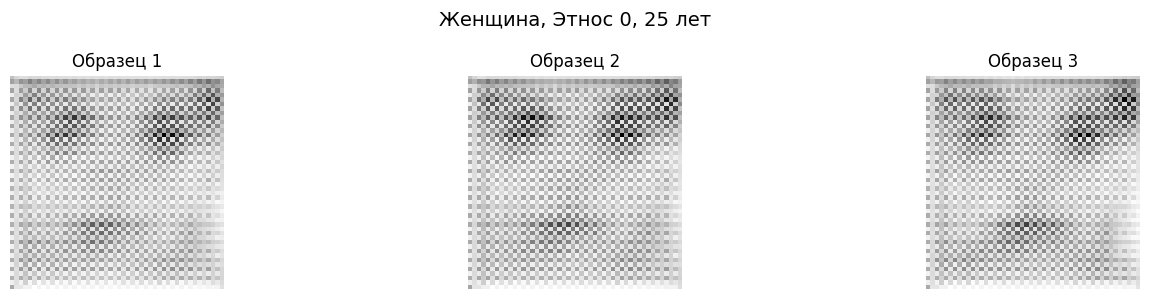


Мужчина средних лет азиатской внешности:


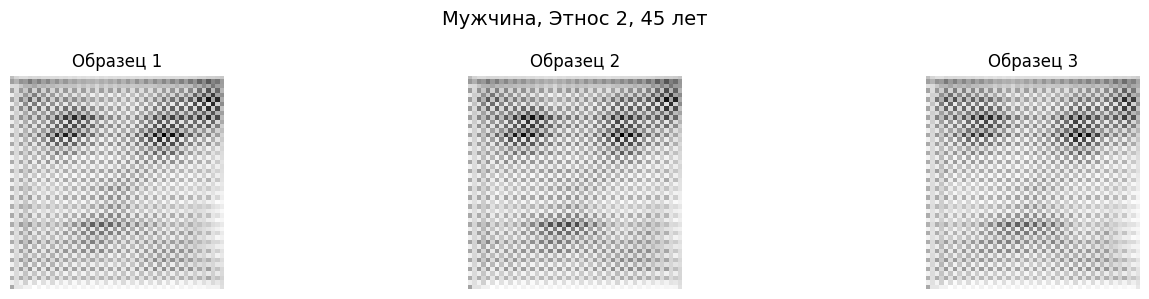


Пожилая женщина афроамериканской внешности:


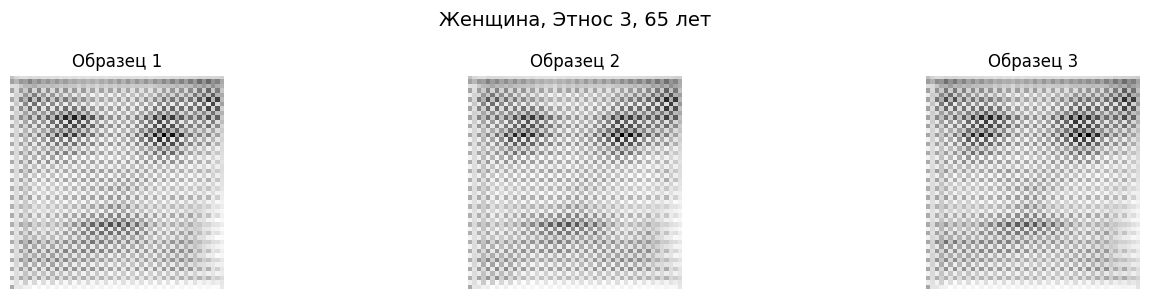

In [ ]:
# Демонстрация
print("Демонстрация генерации...")
examples = [
    (1, 0, 25, "Молодая женщина европейской внешности"),
    (0, 2, 45, "Мужчина средних лет азиатской внешности"),
    (1, 3, 65, "Пожилая женщина афроамериканской внешности")
]

for gender, ethnicity, age, description in examples:
    print(f"\n{description}:")
    generate_faces(gender, ethnicity, age, num_samples=3)

## Выводы по модели

Данная модель является наиболее перспективной из всех рассмотренных ранее моделей. К сожалению, из-за инфраструктурных ограничений эта модель, как и все остальные рассмотренные модели, также недообучена и поэтому сложно сделать определенные выводы касательно качетва модели. Для того, чтобы оценить качество модели ее необходимо обучить хотя бы на 1000 эпох, а лучше еще больше. Но в целом модель выполняет поставленные перед ней задачи, а именно генерирует изображения лиц по заданным атрибутам (пол, возраст, этнос) и после дообучения модель может быть использована в промышленных либо коммерческих целях.

## Выводы по дипломному проекту

1. В работе решены две задачи:
  1.	Определение пола, возраста и этноса человека по фотографии;
  2.	Генерация лиц по заданным атрибутам
2. Даны рекомендации по дальнейшему улучшению моделей
3. После дополнительных улучшений модели могут применяться при решении практических задач, описанных в пояснительной записке